<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/netflix_titles.csv')

In [ ]:
words = ['hello', 'world']
words.append(['g','h','r'])
words.extend(['a','b','c'])    ### extend와 append의 차이점
words
words.remove('a')
words
del words[1]
words
a.startwith('')  ## .startwith('') ==> ''로 시작되는 줄을 찾아줌
### if 구문의 countinue는 그 if 식에 해당하면 무시하고 넘어가라는 뜻

['hello', ['g', 'h', 'r'], 'b', 'c']

In [ ]:
data.shape

(7787, 12)

In [ ]:
plt.rc('font', size=12)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=14)
plt.rc('figure', titlesize=14)
plt.rcParams['figure.dpi'] = 300

In [ ]:
plt.rc('font', size=12)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=14)
plt.rc('figure', titlesize=14)
plt.rcParams['figure.dpi'] = 300

<Figure size 864x432 with 0 Axes>

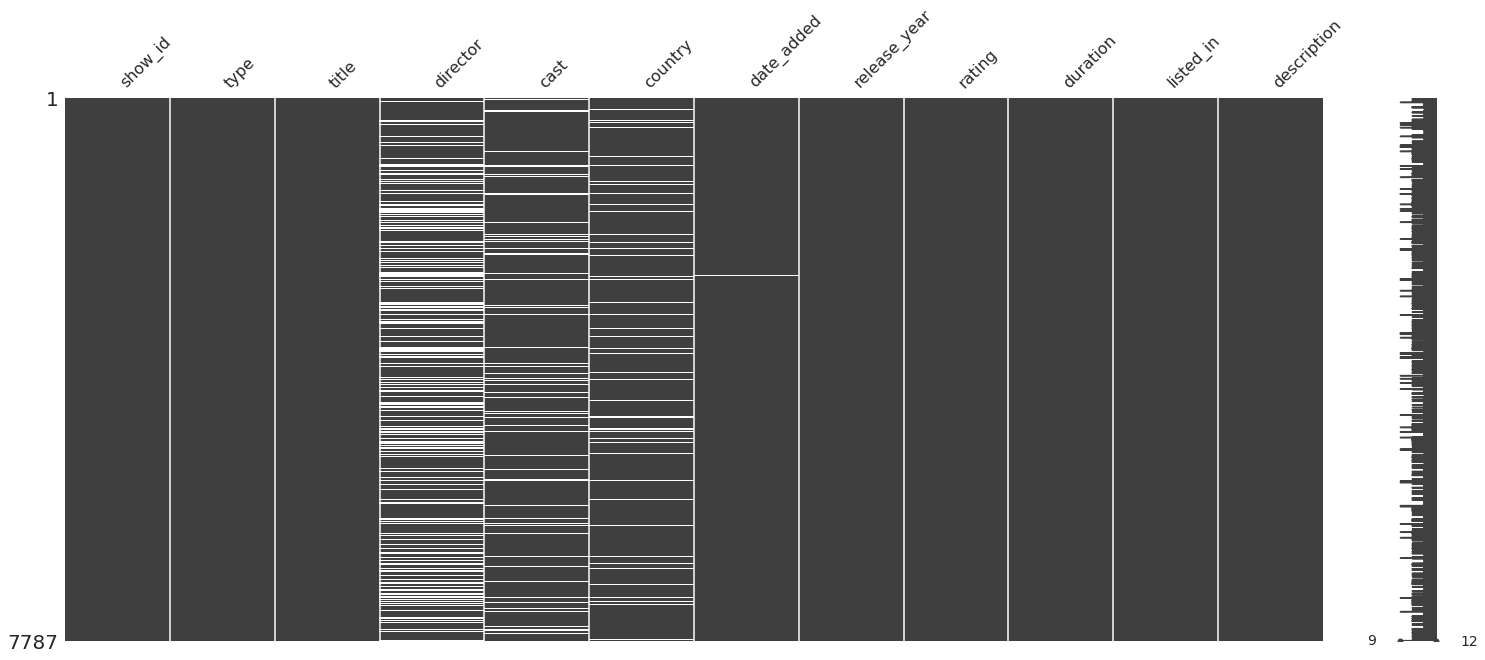

In [ ]:
plt.figure(figsize=(12,6))
msno.matrix(data)

In [ ]:
for i in data.columns:
  null_rate=round(data[i].isnull().sum()/len(data)*100,2)
  if null_rate>0:
    print(f"{i}'s null rate : {null_rate}%")

director's null rate : 30.68%
cast's null rate : 9.22%
country's null rate : 6.51%
date_added's null rate : 0.13%
rating's null rate : 0.09%


In [ ]:
for i in data.columns:
  null_rate = round(data[i].isnull().sum()/len(data)*100,2)
  if null_rate > 0:
    print(f'{i}s null rate : {null_rate}%')

directors null rate : 30.68%
casts null rate : 9.22%
countrys null rate : 6.51%
date_addeds null rate : 0.13%
ratings null rate : 0.09%


In [ ]:
data.describe(include='all').head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.0,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s3961,Movie,Love Is in the Air,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3


In [ ]:
data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s5676,Movie,Agent Raghav,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [ ]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
data = data.fillna('NULL')
data['year_added'] = data['date_added'].apply(lambda x: x.split(',')[-1])
data['year_added'] = data['year_added'].apply(lambda x: x if x != 'NULL' else '2020')
data['year_added'] = data['year_added'].apply(int)

In [ ]:
data = data.fillna('NULL')
data['year_added'] = data['date_added'].apply(lambda x: x.split(',')[-1])
data['year_added'] = data['year_added'].apply(lambda x: x if x !='NULL' else '2020')
data['year_added'] = data['year_added'].apply(int)

In [ ]:
data['year_added'].value_counts()

2019    2153
2020    2019
2018    1685
2017    1225
2016     443
2021     117
2015      88
2014      25
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

In [ ]:
movie = data[data['type'] == 'Movie']
tv_show = data[data['type'] == 'TV Show']

In [ ]:
movie = data[data['type']=='Movie']
tv_show = data[data['type']=='TV Show']

In [ ]:
type_data = data.groupby('type')['year_added'].value_counts().sort_index().unstack().fillna(0).T.astype(int)

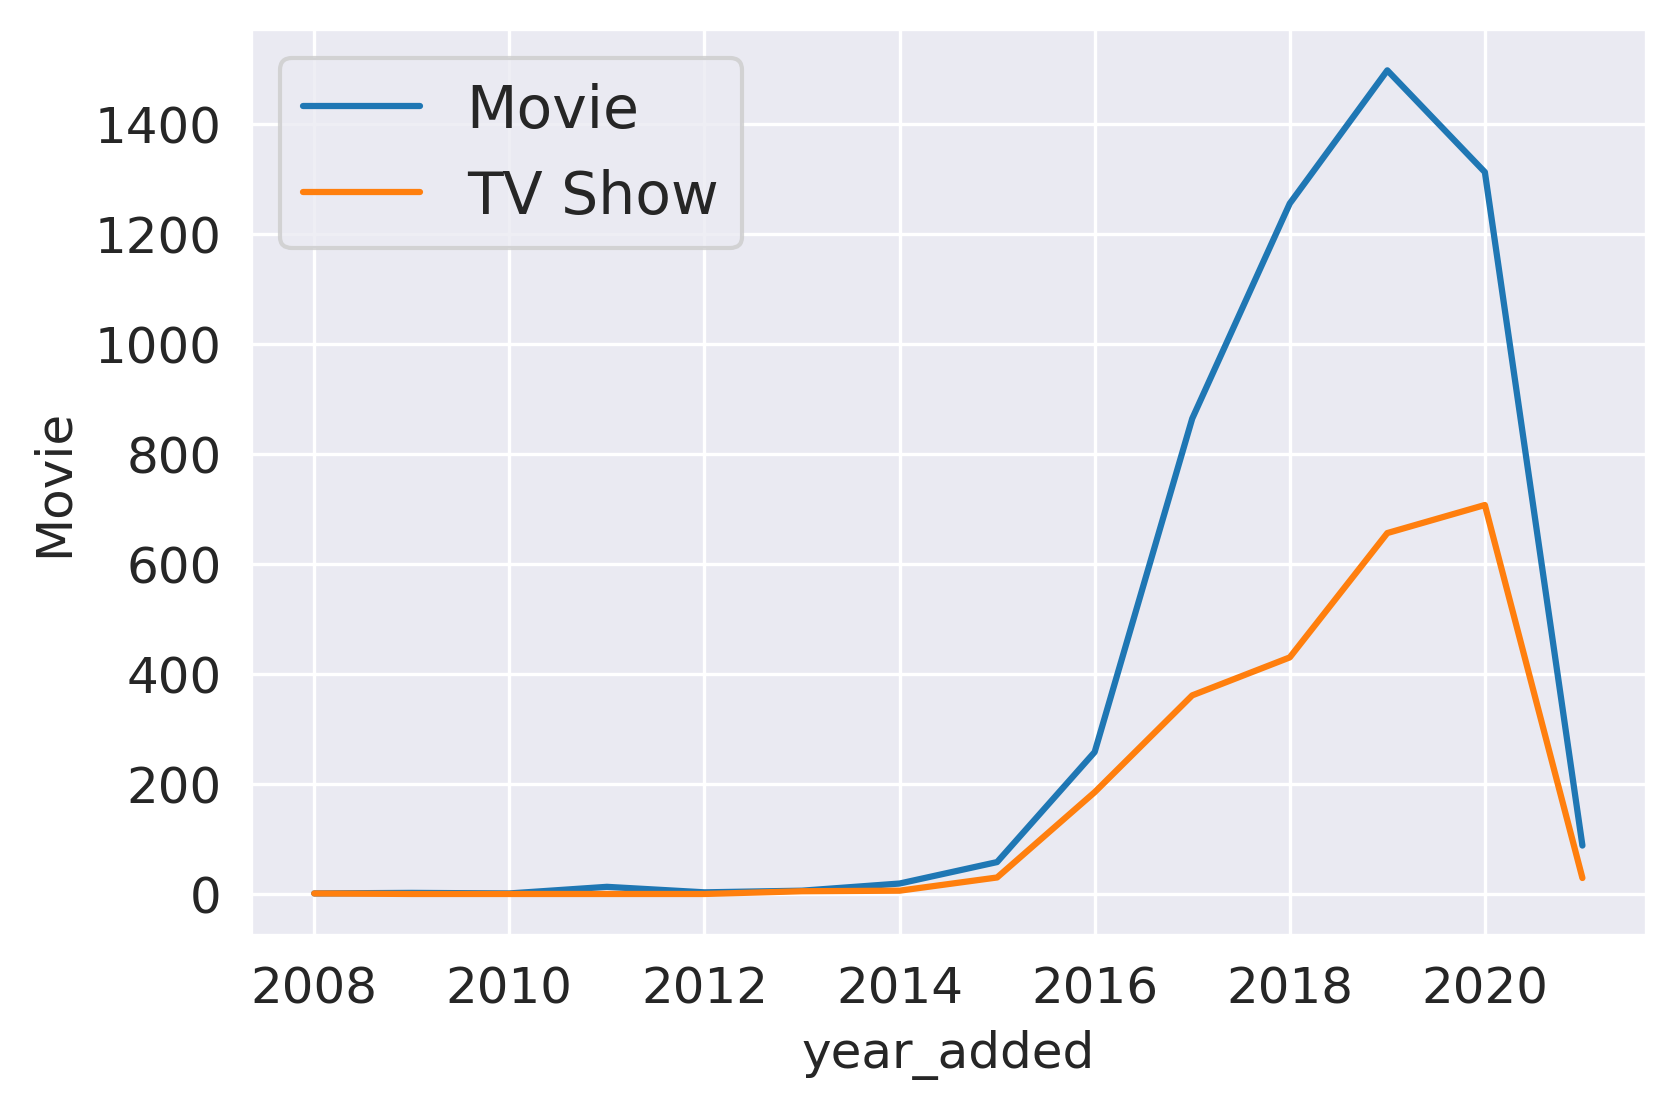

In [ ]:
f, ax = plt.subplots()
ax = sns.lineplot(x=type_data.index, y=type_data['Movie'], label='Movie')
ax = sns.lineplot(x=type_data.index, y=type_data['TV Show'], label='TV Show')

groupby('')[''].value_counts().sort_index().unstack() ==> 시리즈 재구성 unstack()

In [ ]:
import matplotlib.patheffects as path_effects
year_data = data['year_added'].value_counts().sort_index().loc[:2019]    ## .T ==> transpose()
type_data = data.groupby('type')['year_added'].value_counts().sort_index().unstack().fillna(0).T.loc[:2019]

fig, ax = plt.subplots(1,1, figsize=(28, 15))
ax.plot(year_data.index, year_data, color='white', linewidth=5, label='Total', path_effects=[path_effects.SimpleLineShadow(),
                                                                                             path_effects.Normal()])
ax.plot(type_data.index, type_data['Movie'], color='skyblue', linewidth=5, label='Movie', path_effects=[path_effects.SimpleLineShadow(),
                                                                                                        path_effects.Normal()])
ax.plot(type_data.index, type_data['TV Show'], color='salmon', linewidth=5, label='TV Show', path_effects=[path_effects.SimpleLineShadow(),
                                                                                                           path_effects.Normal()])
ax.set_xlim(2006, 2020)
ax.set_ylim(-40, 2700)

t=[2008,
   2010.8,
   2012.1,
   2013.1,
   2015.7,
   2016.1,
   2016.9]

events = [
    "Launch Streaming Video\n2007.1",
    "Expanding Streaming Service\nStarting with Candata | 2010.11",
    "Expanding to Europe\n2012.1",
    "First Original Content\n2013.2",
    "Expanding to Japan\n2015.9",
    "Original targeting Kids\n2016/1",
    "Offline Playback Features to all of Users\n2016/11"
]

up_down = [100, 110, 280, 110, 0, 0, 0]
left_right = [-1, 0, 0, 0, 1, 1, 1.6]

for t_i, event_i, ud_i, lr_i in zip(t, events, up_down, left_right):
  ax.annotate(event_i, xy=(t_i + lr_i, year_data[int(t_i)] * (int(t_i+1)-t_1) + year_data[int(t_i)+1] * ))

Movie      5377
TV Show    2410
Name: type, dtype: int64

from collections import Counter ==> 하나의 문자열에서 문자를 count 해주는것

''.join(리스트) ==> 리스트를 하나의 문자열로 변환

In [ ]:
from collections import Counter
country_data = data['country']    ### null 데이터있으면 오류뜸
country_counting = pd.Series(dict(Counter(','.join(country_data).replace(' ,', ',').replace(', ', ',').split(',')))).sort_values(ascending=False)
country_counting.drop(['NULL'], axis=0, inplace=True)

In [ ]:
from collections import Counter
country_data = data['country']
country_counting = pd.Series(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(','))).sort_values(ascending=False)
country_counting.drop(['NULL'], axis=0, inplace=True)

TypeError: ignored

In [ ]:
country_counting

United States     3297
India              990
United Kingdom     723
Canada             412
France             349
                  ... 
Azerbaijan           1
Bermuda              1
Ecuador              1
Mongolia             1
Montenegro           1
Length: 118, dtype: int64

In [ ]:
b = data['country']
Counter(','.join(b).replace(' ,', ',').replace(', ', ',').split(',')

Counter({'': 4,
         'Afghanistan': 1,
         'Albania': 1,
         'Algeria': 2,
         'Angola': 1,
         'Argentina': 82,
         'Armenia': 1,
         'Australia': 144,
         'Austria': 11,
         'Azerbaijan': 1,
         'Bahamas': 1,
         'Bangladesh': 3,
         'Belarus': 1,
         'Belgium': 85,
         'Bermuda': 1,
         'Botswana': 1,
         'Brazil': 88,
         'Bulgaria': 9,
         'Cambodia': 5,
         'Canada': 412,
         'Cayman Islands': 2,
         'Chile': 26,
         'China': 147,
         'Colombia': 45,
         'Croatia': 4,
         'Cuba': 1,
         'Cyprus': 1,
         'Czech Republic': 20,
         'Denmark': 44,
         'Dominican Republic': 1,
         'East Germany': 1,
         'Ecuador': 1,
         'Egypt': 110,
         'Finland': 11,
         'France': 349,
         'Georgia': 2,
         'Germany': 199,
         'Ghana': 4,
         'Greece': 10,
         'Guatemala': 2,
         'Hong Kong': 102,
     

In [ ]:
pd.Series(Counter(','.join(country_data).replace(' ,',',').replace(', ', ',').split(',')))

TypeError: ignored

In [ ]:
tot = sum(country_counting)
top20 = sum(country_counting[:20])

print(f'total : {tot}')
print(f'top 20 counties : {top20}')
print(f'Percentage of top 20 : {top20}/{tot}={100*top20/tot}%')

total : 9067
top 20 counties : 7879
Percentage of top 20 : 7879/9067=86.8975405315981%


In [ ]:
tot = sum(country_counting)
top20 = sum(country_counting[:20])

print(f'total {tot}')
print(f'top20 countries : {top20}')
print(f'Percentage of top20 : {top20}/{tot}*100={top20/tot*100}%')

total 9067
top20 countries : 7879
Percentage of top20 : 7879/9067*100=86.89754053159811%


In [ ]:
top20_country = country_counting[:20]

In [ ]:
country_counting.head(20)

United States     3297
India              990
United Kingdom     723
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Mexico             154
China              147
Australia          144
Egypt              110
Turkey             108
Hong Kong          102
Italy               90
Brazil              88
Taiwan              85
Belgium             85
Argentina           82
dtype: int64

In [ ]:
top20_country = country_counting[:20]

(-1.1097708990458806,
 1.1163927097227726,
 -1.1042294788704925,
 1.185497516611138)

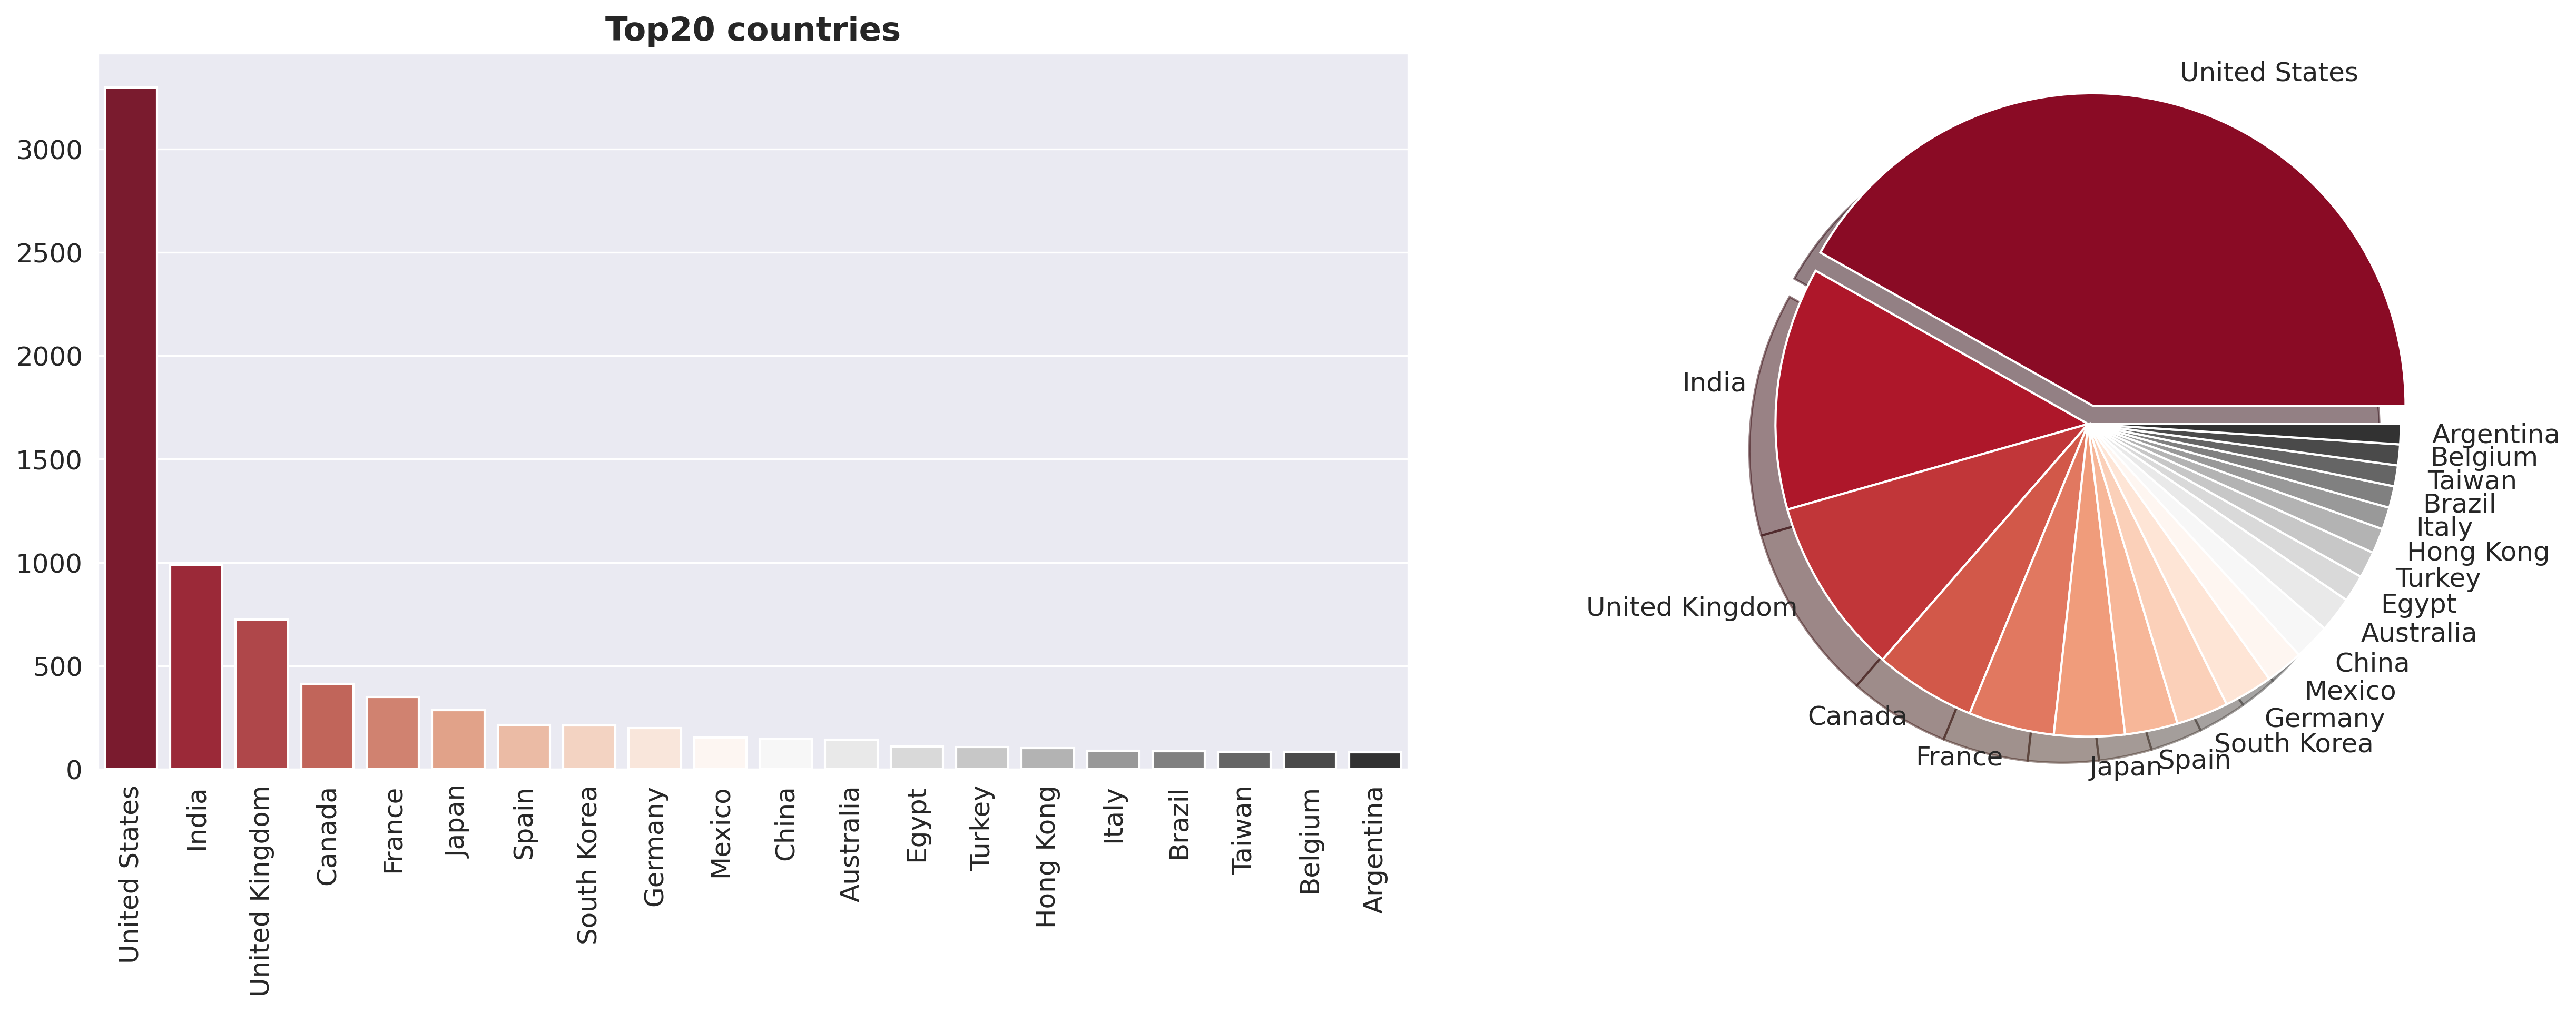

In [ ]:
from matplotlib import gridspec
fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[8], width_ratios=[10, 7])

ax = plt.subplot(gs[0])
sns.barplot(top20_country.index, top20_country, ax=ax, palette='RdGy')
ax.set_xticklabels(top20_country.index, rotation=90)
ax.set_title('Top20 countries', fontsize=15, fontweight='bold')

explode = [0 for _ in range(len(top20_country))]
explode[0] = 0.06

ax2 = plt.subplot(gs[1])
ax2.pie(top20_country, labels=top20_country.index, shadow=True, startangle=0, explode=explode, colors=sns.color_palette('RdGy', n_colors=20))
ax2.axis('equal')

In [ ]:
from matplotlib import gridspec
fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[8], width_ratios=[10, 7])

ax = plt.subplot(gs[0])
sns.barplot(top20_country.index, top20_country, ax=ax, palette='RdGy')
ax.set_xticklabels(top20_country.index, rotation=90)
ax.set_title('Top20 countries', fontsize=15, fontweight='bold')

explode = [0 for _ in range(20)]
explode[0] = 0.06

ax2 = plt.subplot(gs[1])
ax2.pie(top20_country, labels=top20_country.index, shadow=True, startangle=0, explode=explode,
        colors=sns.color_palette('RdGy', n_colors=20))
ax2.axis('eaual')

NameError: ignored

(-1.1097708990458806,
 1.1163927097227726,
 -1.1042294788704925,
 1.185497516611138)

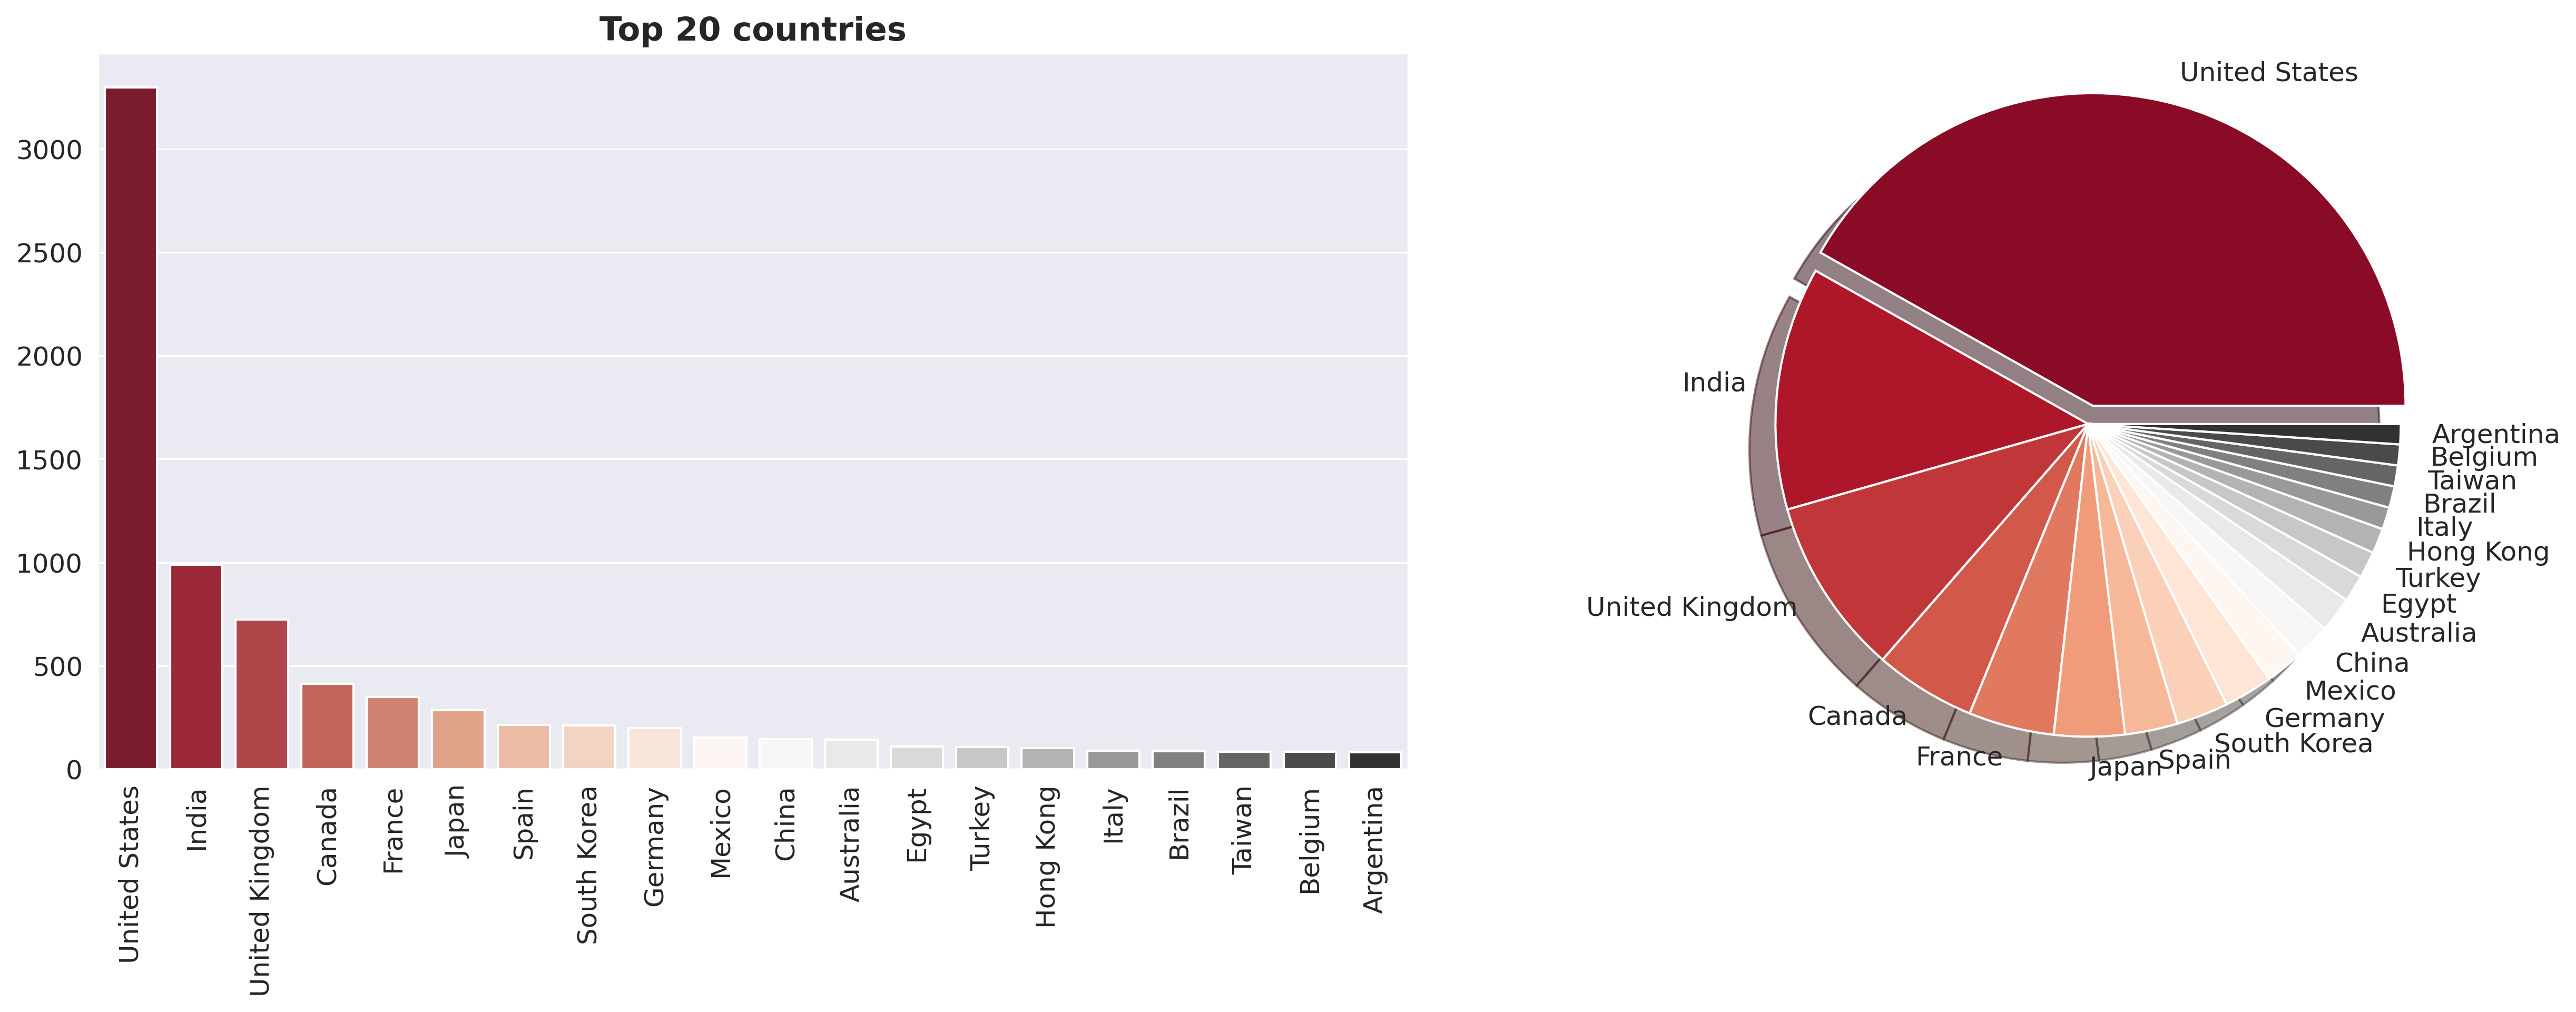

In [ ]:
from matplotlib import gridspec
fig = plt.figure(figsize=(20,6))    ## height_ratios=[,], width_ratios=[,] 각 행,열 크기 지정
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[8], width_ratios=[10, 7]) 

ax = plt.subplot(gs[0])
sns.barplot(top20_country.index, top20_country, ax=ax, palette='RdGy')
ax.set_xticklabels(top20_country.index, rotation=90)
ax.set_title('Top 20 countries', fontsize=15, fontweight='bold')

explode = [0 for _ in range(20)]
explode[0] = 0.06
 ### explode ==> pie 그래프의 갈라짐 (돌출 크기)
ax2 = plt.subplot(gs[1])
ax2.pie(top20_country, labels=top20_country.index, shadow=True, startangle=0, explode=explode,
        colors=sns.color_palette('RdGy', n_colors=20))
ax2.axis('equal')

In [ ]:
!pip install squarify

Text(0.5, 1.0, 'Top 20 country')

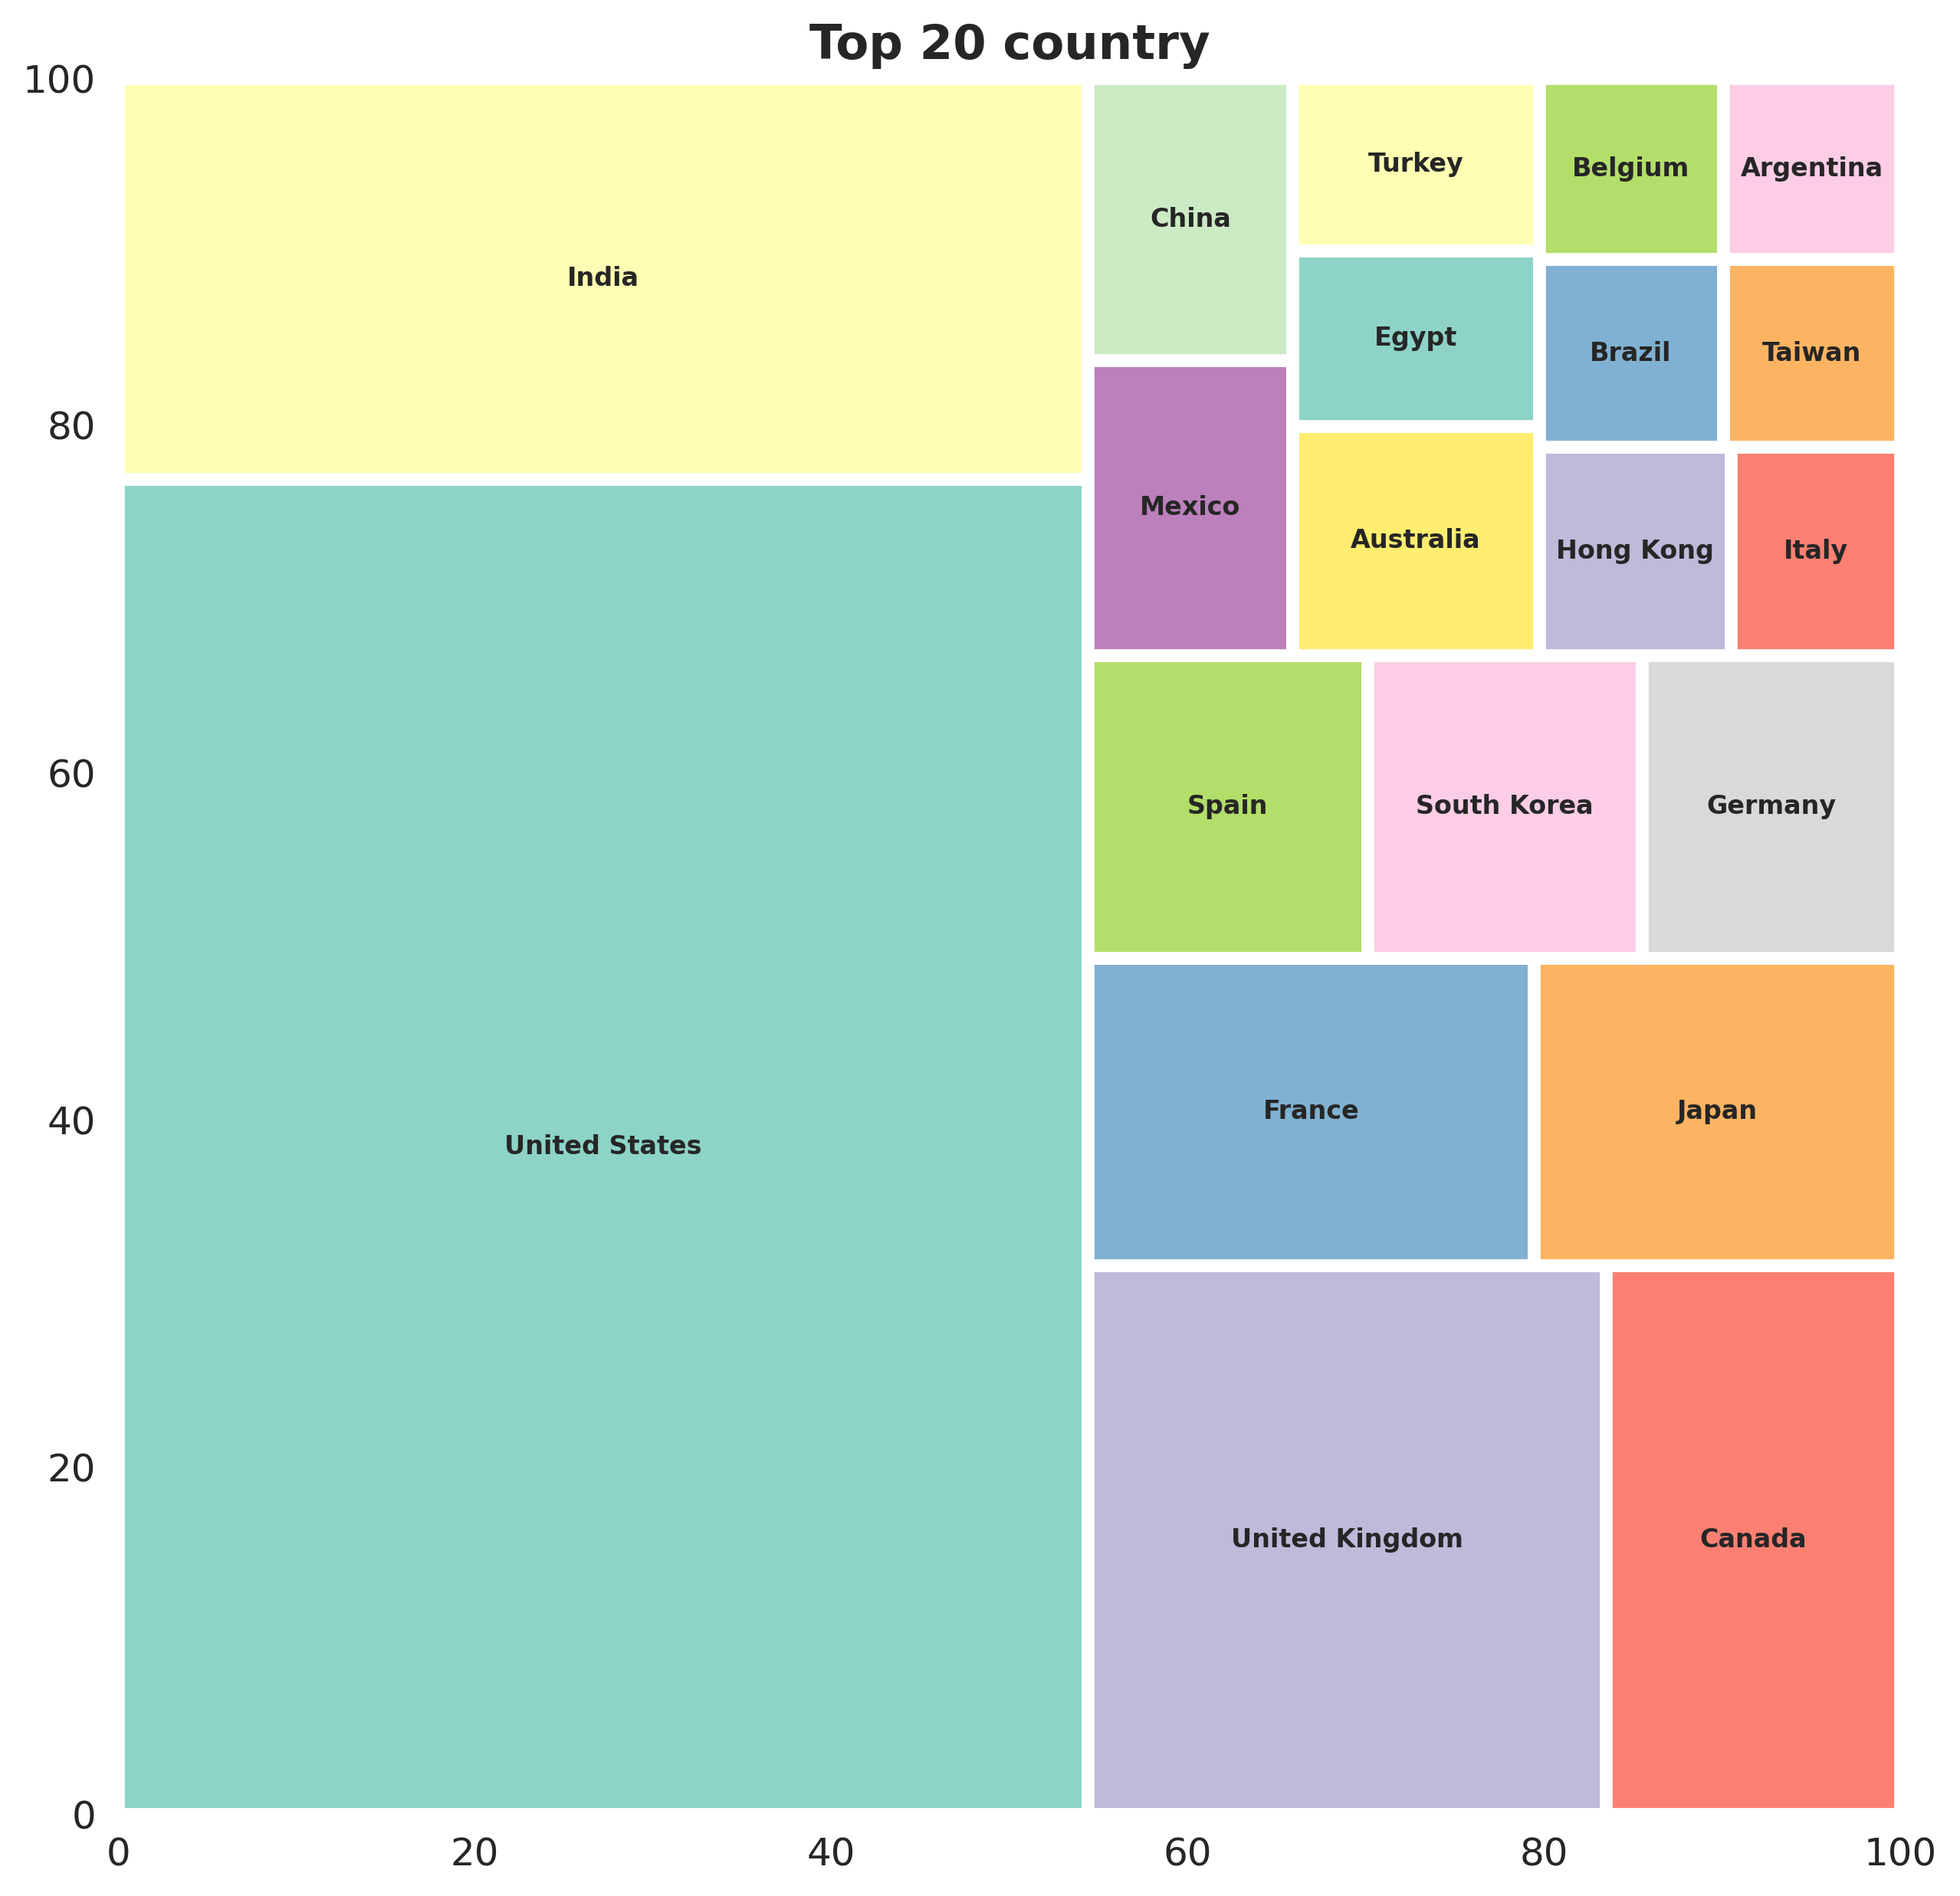

In [ ]:
import squarify

fig = plt.figure(figsize=(10,10))
squarify.plot(sizes=top20_country.values, label=top20_country.index, color=sns.color_palette('Set3', n_colors=20),
              linewidth=4, text_kwargs={'fontsize':8, 'fontweight':'bold'})
plt.title('Top 20 country', fontsize=15, fontweight='bold')

Text(0.5, 1.0, 'Top 20 countries')

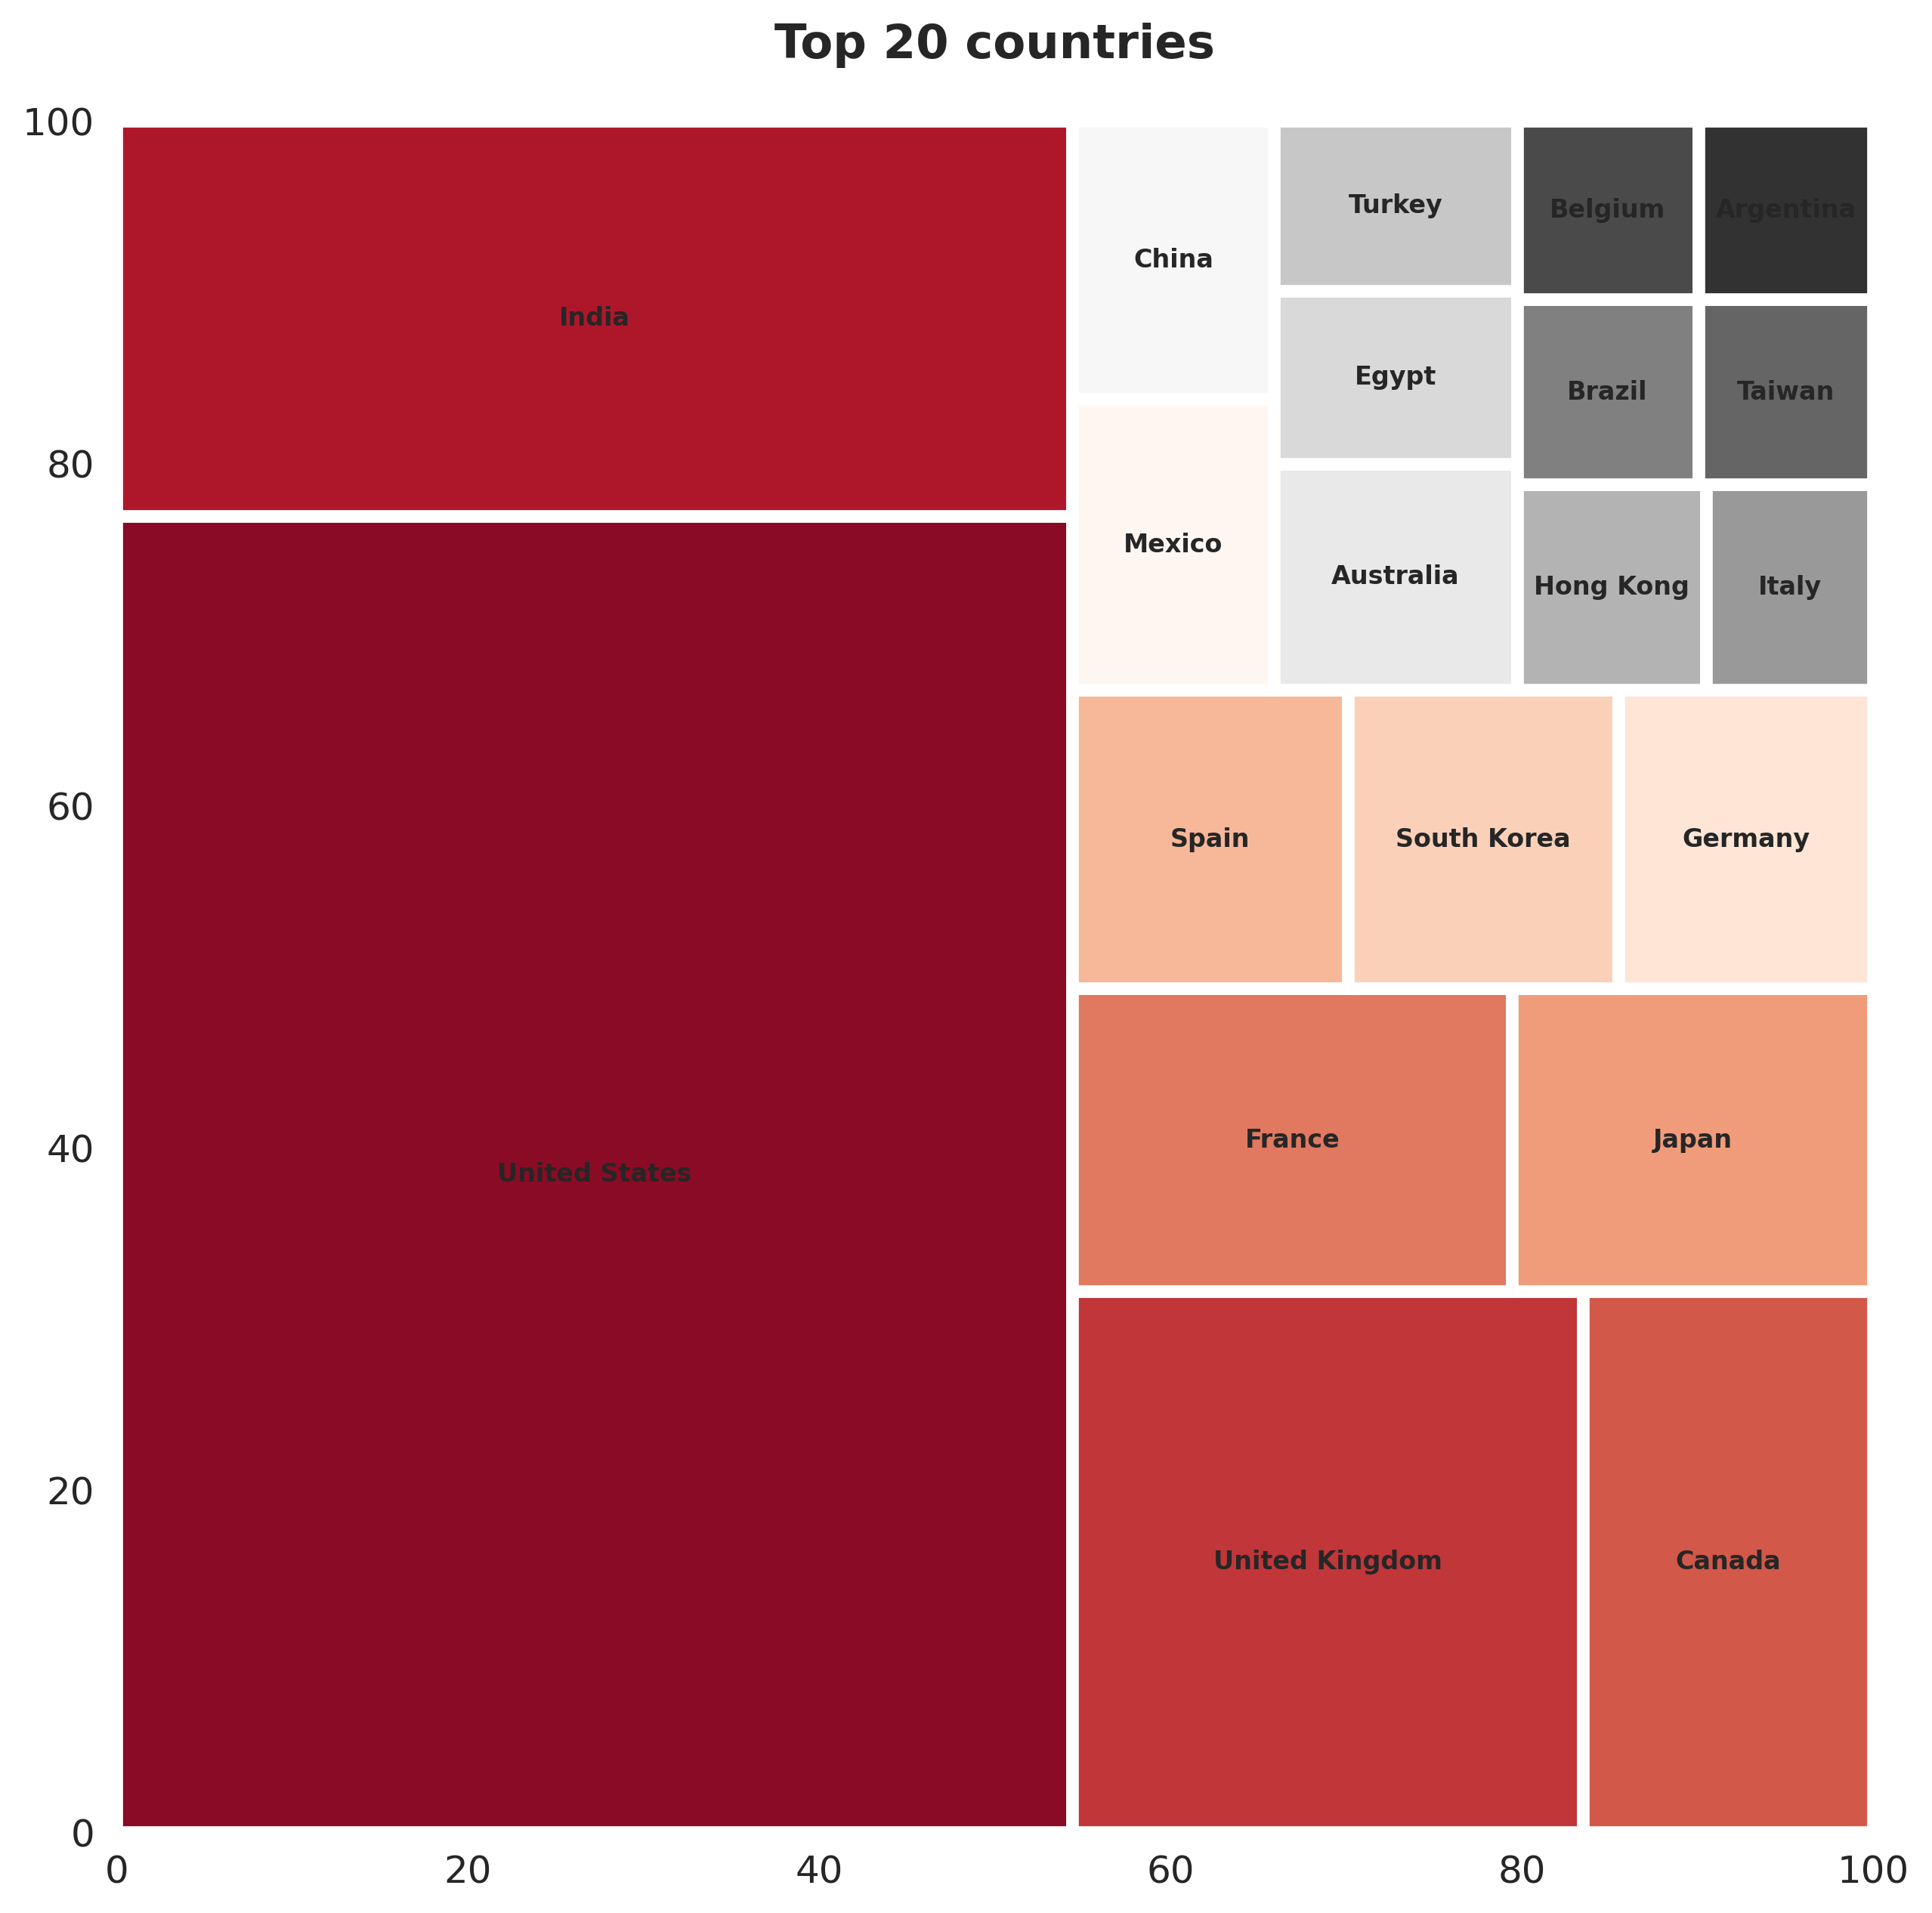

In [ ]:
import squarify

y = top20_country
fig = plt.figure(figsize=(10,10))
squarify.plot(sizes=y.values, label=y.index, color=sns.color_palette('RdGy', n_colors=20),
              linewidth=4, text_kwargs={'fontsize':8, 'fontweight':'bold'})
plt.title('Top 20 countries', fontsize=15, pad=20, fontweight='bold')


(0.0, 100.0, 0.0, 100.0)

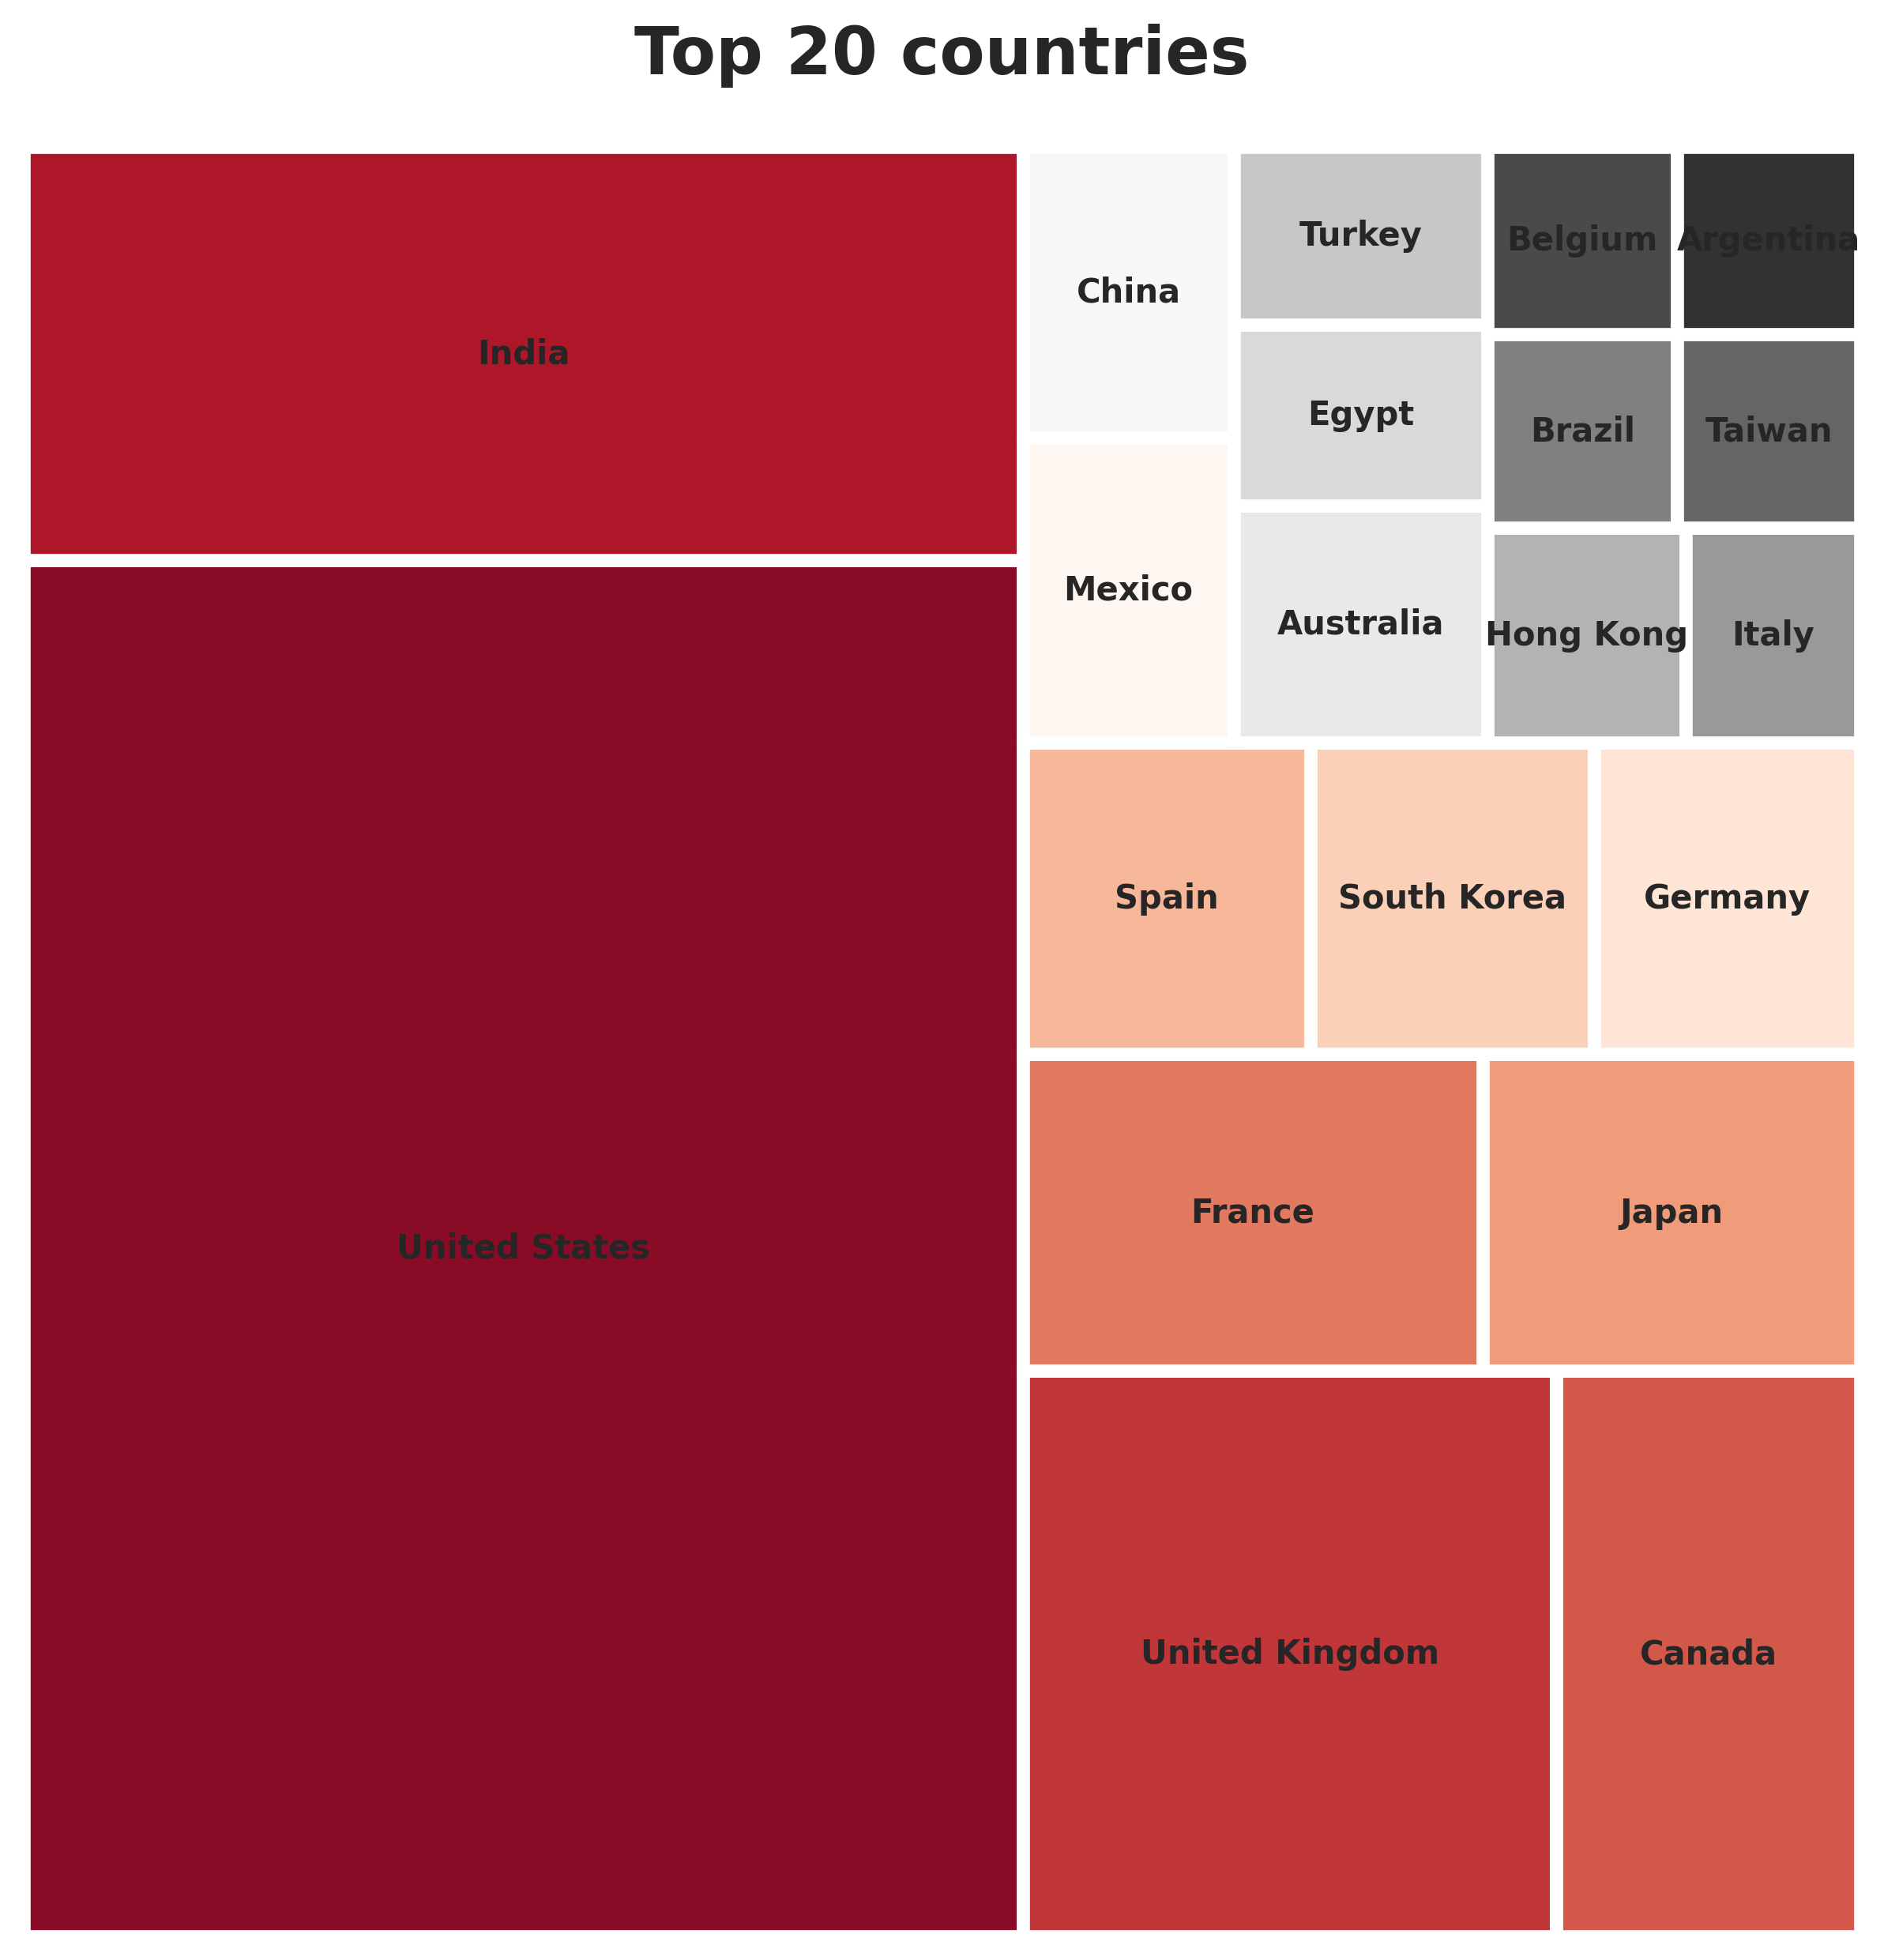

In [ ]:
import squarify

y = top20_country
fig = plt.figure(figsize=(10,10))
squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette('RdGy', n_colors=20),
              linewidth=4, text_kwargs={'fontsize':10, 'fontweight':'bold'})
plt.title('Top 20 countries', position=(0.5, 1.0+0.03), fontsize=20, fontweight='bold')
plt.axis('off')   ## y축 라벨 제거

In [ ]:
### 필사 마저하기

In [ ]:
data['country'] = data['country'].dropna().apply(lambda x: x.replace(' ,', ',').replace(', ', ',').split(','))
lst_col = 'country'
data2 = pd.DataFrame({col : np.repeat(data[col].values, data[lst_col].str.len())
for col in data.columns.drop(lst_col)}).assign(**{lst_col:np.concatenate(data[lst_col].values)})[data.columns.tolist()]

AttributeError: ignored

In [ ]:
data1 = data.copy()

In [ ]:
data1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",[Brazil],"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",[Mexico],"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"[Dramas, International Movies]"
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",[Singapore],"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","[Horror Movies, International Movies]"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",[United States],"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[Action & Adventure, Independent Movies, Sci-F..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",[United States],"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,[Dramas]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","[Sweden, Czech Republic, United Kingdom, De...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,"[Dramas, International Movies]"
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",[India],"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,"[Dramas, International Movies, Music & Musicals]"
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...","[Documentaries, International Movies, Music & ..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",[Australia],"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,"[International TV Shows, Reality TV]"


In [ ]:
data.dropna(subset=['country'], axis=0, inplace=True)

In [ ]:
data.country = data.country.replace(' ,', ',').replace(', ', ',').str.split(',')

In [ ]:
','.join(data.country).replace(', ',',')

TypeError: ignored

In [ ]:
','.join(data.country).str.split(',')

TypeError: ignored

In [ ]:
Counter(','.join(data.country))

TypeError: ignored

In [ ]:
data.country.value_counts().tail(20)  ### 이것들을 어떻게 낱개로 처리할수있을까

Brazil, India, China, United States                                                                         1
United States, Colombia, Mexico                                                                             1
Turkey, India                                                                                               1
Taiwan, China                                                                                               1
United States, South Korea, Japan                                                                           1
Australia, France, Ireland                                                                                  1
Italy, Belgium                                                                                              1
Spain, France, United States                                                                                1
Italy, Switzerland, France, Germany                                                                         1
France, Ne

In [ ]:
data1['country'] = data1.country.dropna()

In [ ]:
import plotly.express as px
year_country2 = data2.groupby('year_added')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country2, locations='country', color='counts',
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd)
fig.update_layout(title='Comparison by country')

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
def relation_heatmap(df, title):
  df['genre'] = df['listed_in'].apply(lambda x: x.replace(' ,', ',').replace(', ',',').split(','))
  Types = []
  for i in df['genre']: Types += i
  Types = set(Types)
  print(f'There are {len(Types)} types in the Netflix {title} Dataset')
  test = df['genre']
  mlb = MultiLabelBinarizer()
  res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
  corr = res.corr()
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  fig, ax = plt.subplots(figsize=(15,14))
  pl = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.5, vmin=-0.5, center=0, square=True, linewidths=.7, cbar_kws={'shrink': 0.6})
  plt.show()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Documentaries]                                       334
[Stand-Up Comedy]                                     321
[Dramas, International Movies]                        320
[Comedies, Dramas, International Movies]              243
[Dramas, Independent Movies, International Movies]    215
                                                     ... 
[Comedies, LGBTQ Movies, Music & Musicals]              1
[TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows]         1
[Anime Features, Romantic Movies]                       1
[Horror Movies, LGBTQ Movies, Music & Musicals]         1
[Dramas, Faith & Spirituality, Romantic Movies]         1
Name: genre, Length: 492, dtype: int64

MultiLabelBinarizer() ==> 원핫 코딩이랑 비슷

fit_transfrom(시리즈)을 해주어서 시리즈를 변경함

columns=mlb.classes_ 해주어야 칼럼이 찍힘

In [ ]:
data1['genre'] = data1['listed_in'].apply(lambda x: x.replace(' ,', ',').replace(', ', ',').split(','))
test1 = data1['genre']
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test1), columns=mlb.classes_, index=test1.index)
res

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,International TV Shows,Kids' TV,Korean TV Shows,LGBTQ Movies,Movies,Music & Musicals,Reality TV,Romantic Movies,Romantic TV Shows,Sci-Fi & Fantasy,Science & Nature TV,Spanish-Language TV Shows,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7783,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7784,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7785,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


There are 22 types in the Netflix TV Show Dataset


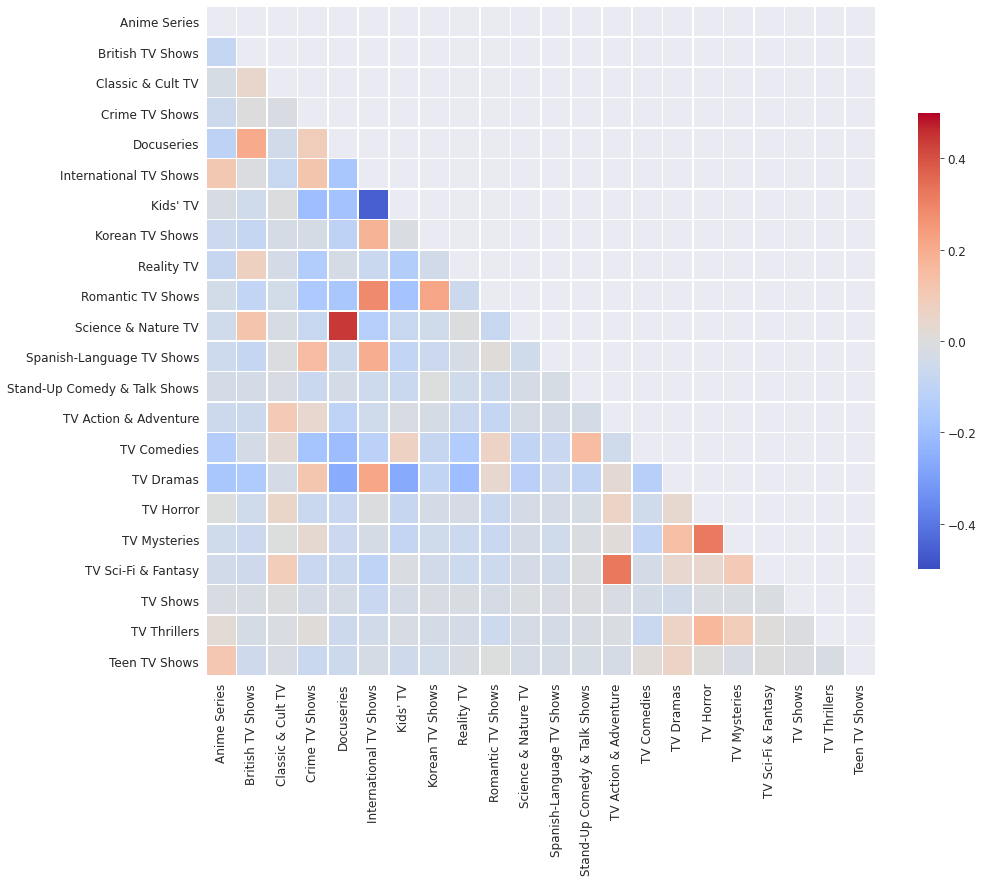

In [ ]:
relation_heatmap(tv_show, 'TV Show')

There are 20 types in the Netflix Movie Dataset


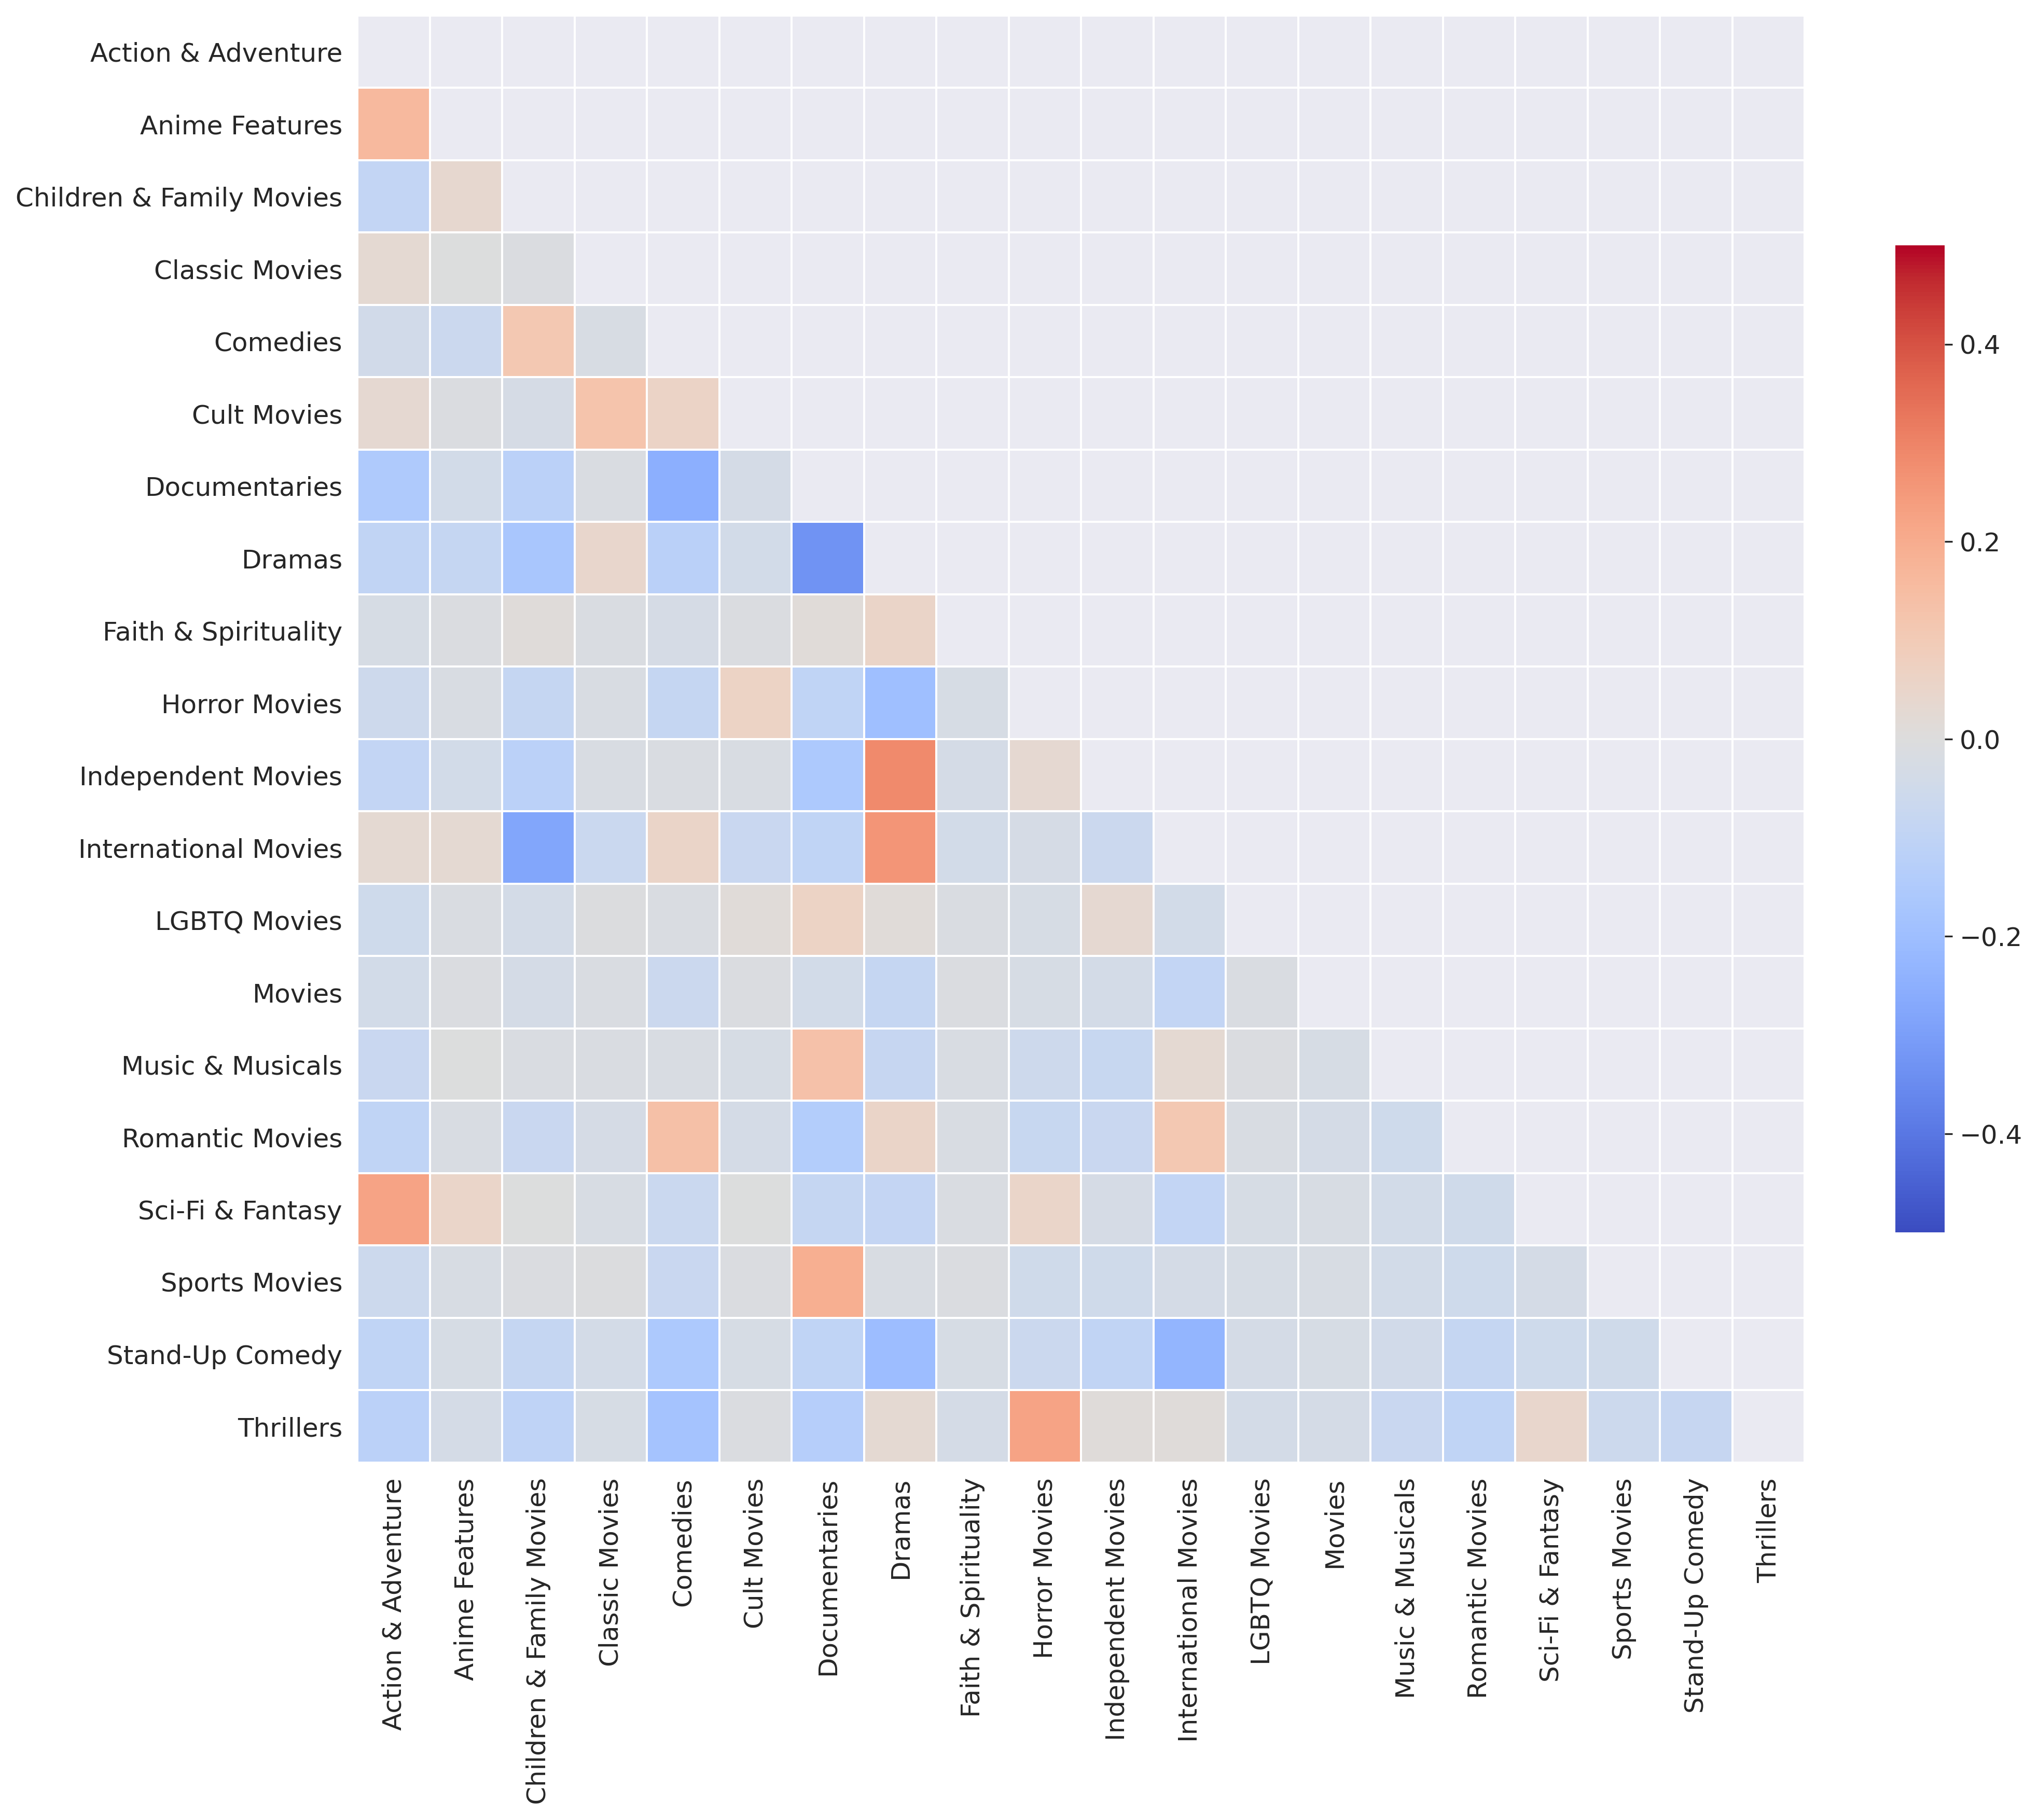

In [ ]:
relation_heatmap(movie, 'Movie')

In [ ]:
rating_order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
movie_rating = movie['rating'].value_counts()[rating_order]
movie_rating

G             39
TV-Y         117
TV-G         111
PG           247
TV-Y7         95
TV-Y7-FV       5
TV-PG        505
PG-13        386
TV-14       1272
R            663
NC-17          3
TV-MA       1845
Name: rating, dtype: int64

In [ ]:
def rating_barplot(data, title, height, h_lim=None):
  fig, ax = plt.subplots(1,1, figsize=(20,10))
  if h_lim:
    ax.set_ylim(0, h_lim)
  ax.bar(data.index, data, color='#d0d0d0', width=0.6, edgecolor='black')
  color = ['green', 'blue', 'orange', 'red']
  span_range=[[0,2], [3,6], [7,8], [9,11]]

  for idx, sub_title in enumerate(['Little Kides', 'Older Kids', 'Teens', 'Mature']):
    ax.annotate(sub_title,
                xy=(sum(span_range[idx])/2, height),
                xytext=(0,0), textcoords='offset points',
                va='center', ha='center',
                color='w', fontsize=15, fontweight='bold', bbox=dict(boxstyle='round4', pad=.4, color=color[idx], alpha=.6))
    ax.axvspan(span_range[idx][0]-0.4, span_range[idx][1]+.4, color=color[idx], alpha=0.1)
  
  ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))

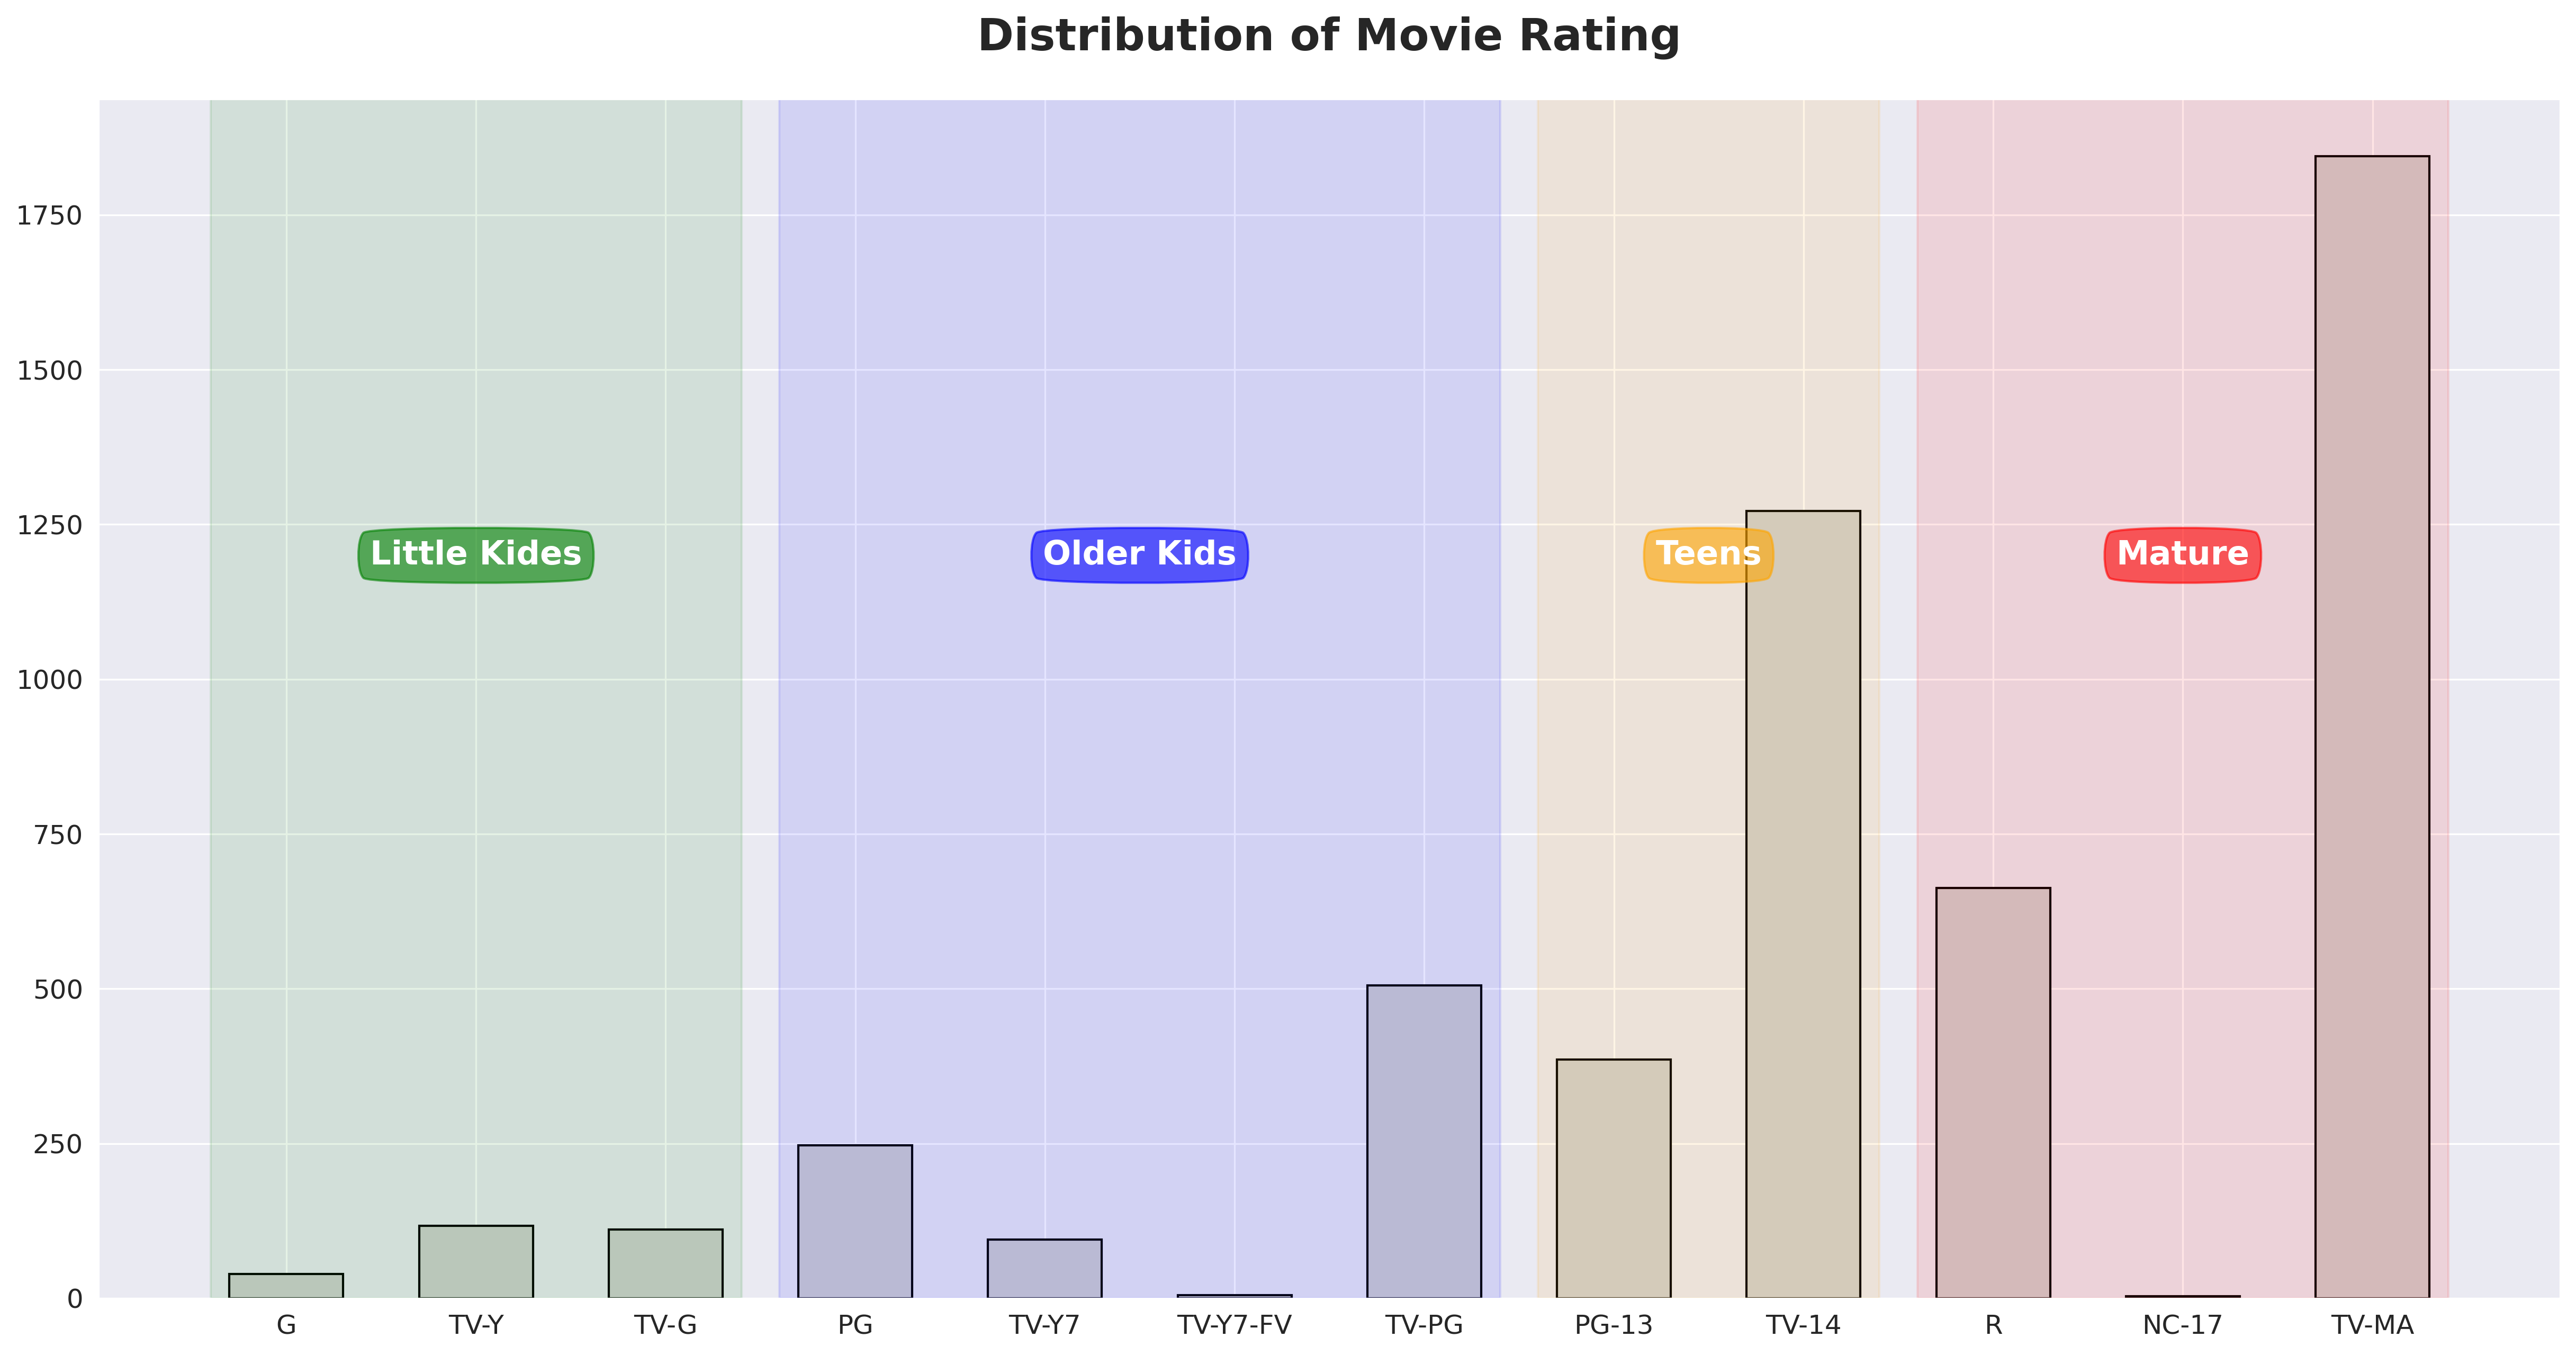

In [ ]:
rating_barplot(movie_rating, 'Movie', 1200)

In [ ]:
data2.country.value_counts().sum()

9574

In [ ]:
!pip install squarify

In [ ]:
!pip install plotly.express

In [ ]:
### 내가 연습한것들

In [ ]:
### EDA 및 전처리 연습

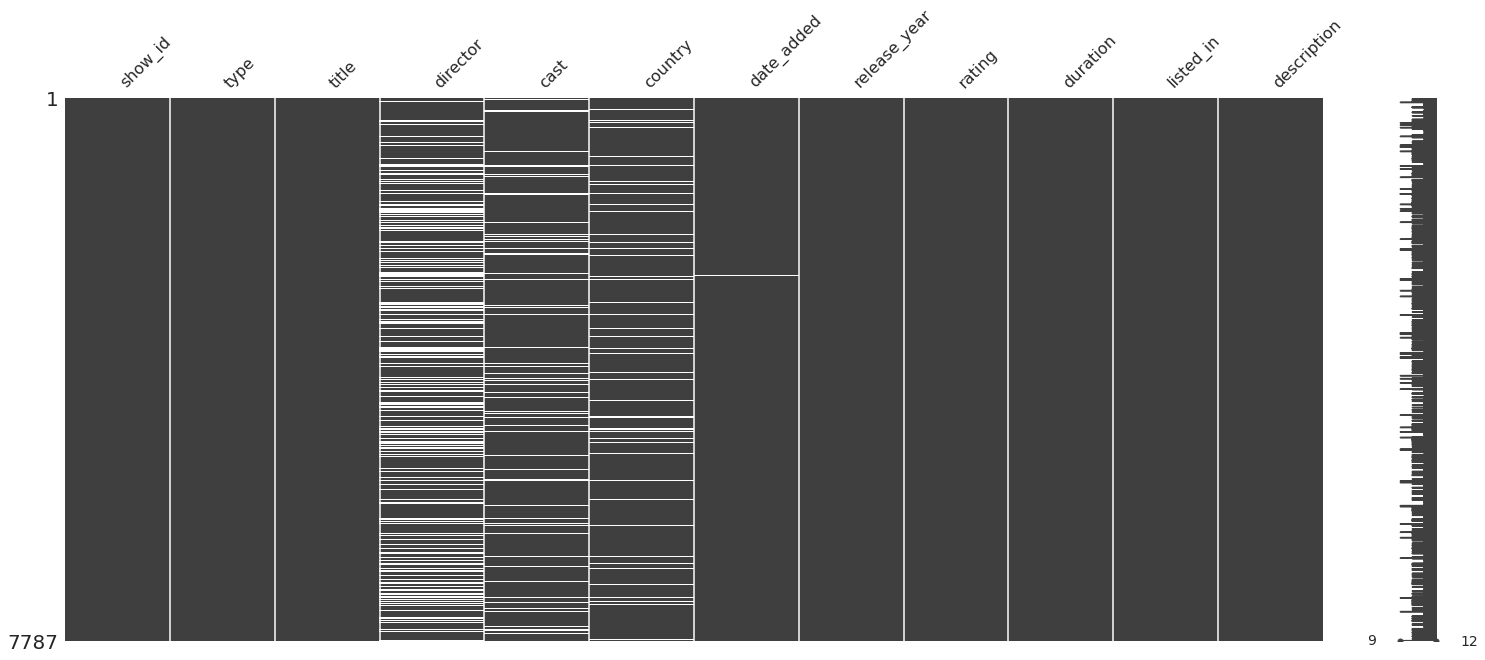

In [ ]:
msno.matrix(data)

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,1


In [ ]:
data.date_added = data.date_added.str.lstrip()   ## 왼쪽 공백 제거

In [ ]:
data.date_added = data.date_added.str.lstrip()

In [ ]:
data.dropna(axis=0, subset=['date_added'], inplace=True)             ## 특정 열의 dropna는 subset을 이용해서 drop 시킨다.

In [ ]:
data.date_added.isnull().sum()

0

In [ ]:
data['year'] = data.date_added.str.split(', ').str[1]

In [ ]:
data['month'] = data.date_added.str.split(', ').str[0].str.split(' ').str[0]
data['day'] = data.date_added.str.split(', ').str[0].str.split(' ').str[1]

In [ ]:
data['year']=data['year'].astype(int)
data['day'] = data['day'].astype(int)

In [ ]:
data['year'].nunique()

14

In [ ]:
data['day'].value_counts(dropna=False)

1     2069
15     644
31     274
2      247
16     240
20     219
10     213
5      207
19     203
8      190
22     185
30     182
25     180
18     178
26     174
21     172
28     172
6      165
7      162
14     161
12     156
27     153
13     153
17     153
4      151
23     138
24     136
29     130
3      127
11     123
9      120
Name: day, dtype: int64

In [ ]:
data['month'] = data['date_added'].str.split(', ').str[0].str.split(' ').str[0] ## 시계열 만듬
data['day'] = data['date_added'].str.split(', ').str[0].str.split(' ').str[1]

In [ ]:
data['year'] = ''
for x in data['date_added']:
  data['year'] = data['date_added'].str.split(', ').str[1]  ## 왜 이래?

KeyboardInterrupt: ignored

In [ ]:
a = data.year.value_counts()
a = a.sort_index(ascending=False)

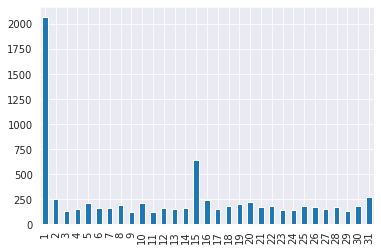

In [ ]:
data.day.value_counts().sort_index().plot.bar()

In [ ]:
data.loc[556, 'date_added'].split(', ')[0].split(' ')[2]

'23'

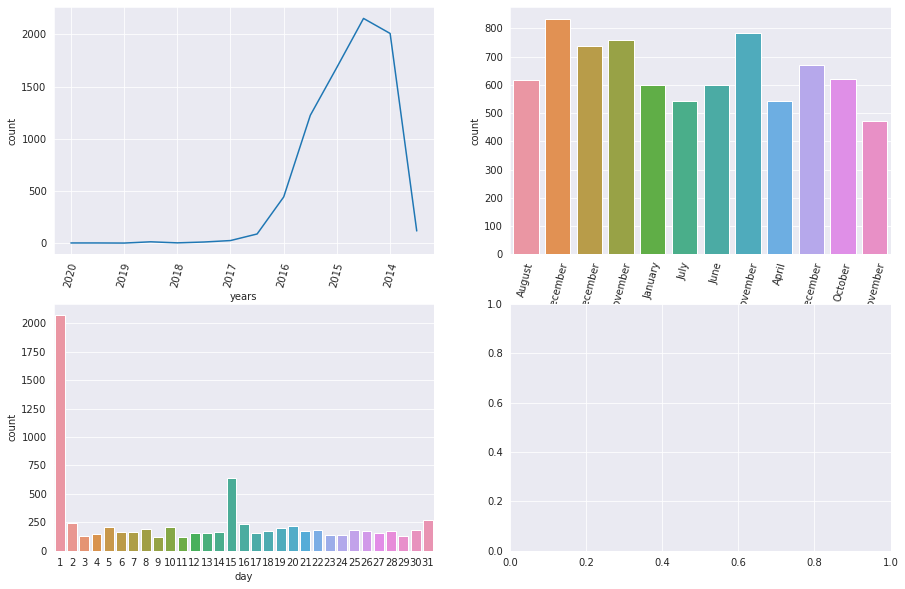

In [ ]:
f, ax = plt.subplots(2,2, figsize=(15,10))
sns.lineplot(x=a.index, y= a, ax=ax[0,0])
ax[0,0].set_xticklabels(a.index, rotation=75)
ax[0,0].set_ylabel('count')
ax[0,0].set_xlabel('years')
sns.countplot(x=data.month, ax=ax[0,1])
ax[0,1].set_xticklabels(data.month, rotation=75)
sns.countplot(x=data.day.sort_index(), ax=ax[1,0])

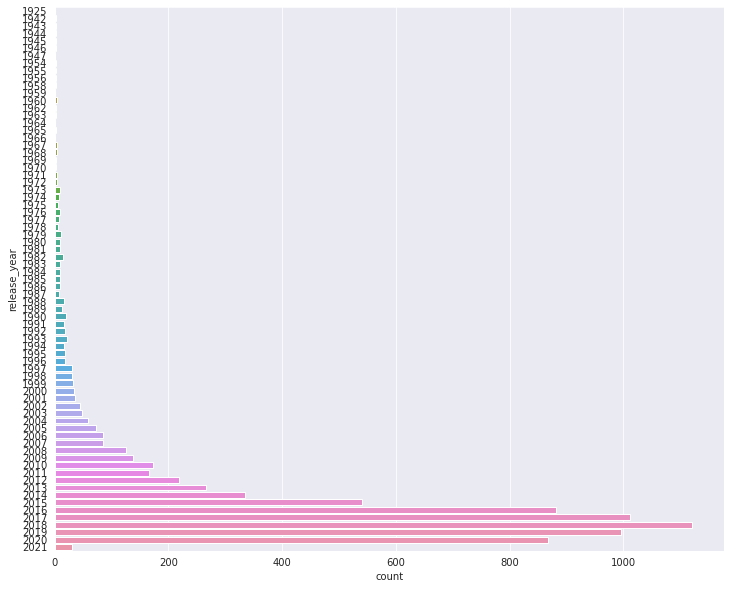

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(y=data.release_year)

In [ ]:
## 우선 시계열 완성했고 문자형을 숫자형으로 바꾸고, 다음 시각화 진행

In [ ]:
data.head(
)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,1


In [ ]:
data.listed_in = data.listed_in.str.lstrip()

In [ ]:
data.listed_in.str.split(', ').str[2].value_counts()  ##<<장르 나누기

International Movies            788
Romantic Movies                 392
TV Dramas                       345
Thrillers                       238
Music & Musicals                180
TV Comedies                     169
Independent Movies              141
Sports Movies                   108
Sci-Fi & Fantasy                106
Romantic TV Shows                92
Spanish-Language TV Shows        92
International TV Shows           85
TV Mysteries                     69
Dramas                           57
TV Sci-Fi & Fantasy              57
LGBTQ Movies                     51
Science & Nature TV              46
Teen TV Shows                    44
TV Thrillers                     39
Reality TV                       38
TV Action & Adventure            36
TV Horror                        33
Korean TV Shows                  20
Docuseries                       18
Comedies                         10
Faith & Spirituality             10
Cult Movies                      10
Horror Movies               

In [ ]:
data1 = data.copy()

In [ ]:
data1['listed_in'] = data1.listed_in.str.split(', ')     ## 안된다. 한 열에 다수의 문자열이 있어서 안되나봐

In [ ]:
a = data1.genre1.value_counts()
b = data1.genre2.value_counts()
c = data1.genre3.value_counts()

In [ ]:
g = pd.concat([a,b,c],axis=1)
g.fillna(0, inplace=True)

In [ ]:
g.astype(int)

,genre1,genre2,genre3
Dramas,1384,665,57
Comedies,1074,387,10
Documentaries,751,34,1
Action & Adventure,721,0,0
International TV Shows,689,424,85
Children & Family Movies,502,27,3
Crime TV Shows,369,57,0
Kids' TV,357,54,1
Stand-Up Comedy,321,8,0
Horror Movies,244,61,7


In [ ]:
data1['genre1'] = data.listed_in.str.split(', ').str[0]
data1['genre2'] = data.listed_in.str.split(', ').str[1]
data1['genre3'] = data.listed_in.str.split(', ').str[2]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 <a list of 36 Text major ticklabel objects>)

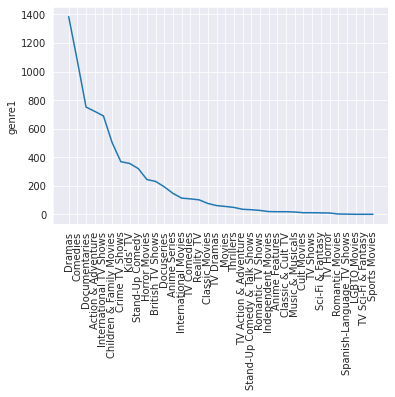

In [ ]:
sns.lineplot(x=data1.genre1.value_counts().index, y= data1.genre1.value_counts())
plt.xticks(rotation=90)

In [ ]:
data1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,genre1,genre2,genre3
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,14,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,23,Dramas,International Movies,NaN
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,20,Horror Movies,International Movies,NaN
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,16,Action & Adventure,Independent Movies,Sci-Fi & Fantasy
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,1,Dramas,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October,19,Dramas,International Movies,NaN
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March,2,Dramas,International Movies,Music & Musicals
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September,25,Documentaries,International Movies,Music & Musicals
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,October,31,International TV Shows,Reality TV,NaN
